In [6]:
import numpy as np
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
import sys
plt.style.use('seaborn-v0_8-darkgrid')
import pandas
from astropy.modeling import models, fitting
from astropy import modeling
from scipy.signal import savgol_filter
#---------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits
import timeit
import os
from pathlib import Path
import sys
import time
import numpy as np
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
from math import floor
from random import choice
import glob
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants
from scipy import interpolate
from scipy import optimize
from scipy import stats
from scipy import ndimage
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
matplotlib.rcParams.update({'font.size': 18})
from scipy.interpolate import interp1d

In [7]:
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Read in files and sort them by day

In [8]:
#grab .fits files from directory
local_path = os.getcwd()
spec_fits_directory = local_path
spec_path = spec_fits_directory
spec_fits_files0 = [i for i in glob.glob(os.path.join(spec_path, 'neid_solar_data/*.fits'))]
print(spec_path)

#pull Julian Dates from each .fits file
days = []
for ind, file in enumerate(spec_fits_files0):
    day= np.round(fits.getheader(file)['OBSJD'])
    days.append(day)
spec_csv_files = [i for i in glob.glob(os.path.join(spec_path, f'fulltemp_results/*.csv'))]
spec_csv_files = np.sort(spec_csv_files)

/Users/kehrich/Downloads/machine_learning_final_project


In [9]:
len(spec_csv_files)

18

In [14]:
#create array of each unique date
uniques = np.unique(days)

#create list of files from each day to create templates
sort_files = []
for uind, uniq in enumerate(uniques):
    inds_vals = np.where(np.asarray(days).astype(int) == int(uniq))
    sort_files.append(np.asarray(spec_fits_files0)[inds_vals[0]])

In [16]:
np.shape(sort_files)

(18, 3)

# Pull Ca II H&K S-Index info and dates from original NEID spectra fits files

In [19]:
obs_jds = []
cak_sinds = []
cak_sind_avgs = []

#create arrays w activity inds and dates, excluding files w/o templates. We pull info from the first of 3 files for each day

for files in sort_files:
    obs_jd=fits.getheader(files[0])['OBSJD']
    act = fits.getdata(files[0], 'ACTIVITY')
    # obs_jds.append(obs_jd)
    # cak_sinds.append(act[0][1])
    # if int(obs_jd) != 2460490 and int(obs_jd) != 2460491:
    obs_jds.append(obs_jd)
    cak_sinds.append(act[0][1])

In [20]:
np.shape(cak_sinds)

(18,)

# Pull pipeline products from .csv file for analysis

In [24]:
theor_lines = []
obs_line_depths = []
fwhm_s = []
gofs = []
obs_lines = []
#create a list that has params from each run per line, one 
#list per line within larger list. Number below is # of lines
for n in range(0,286):
    per_line_depths = []
    per_line_fwhms = []
    per_line_gofs = []
    per_line_obs = []
    for file in spec_csv_files:
        dict_csv = pandas.read_csv(file,delimiter=',')
        theor_line = np.asarray(dict_csv['# line (Angstroms)'])
        obs_line_depth = np.asarray(dict_csv[' depth'])
        fwhm_ = np.asarray(dict_csv[' FWHMs'])
        gof = np.asarray(dict_csv[' goodness of fit'])
        obs_line = np.asarray(dict_csv[' observed line (mean)'])
        # print(obs_line[n])
        per_line_obs.append(obs_line[n])
        per_line_depths.append(obs_line_depth[n])
        per_line_fwhms.append(fwhm_[n])
        per_line_gofs.append(gof[n])
        if file == spec_csv_files[-1]:
            theor_lines.append(theor_line[n])
            obs_line_depths.append(per_line_depths)
            fwhm_s.append(per_line_fwhms)
            gofs.append(per_line_gofs)
            obs_lines.append(per_line_obs)

634.8841418324306
634.8840597385616
634.8841175776389
634.8840572814175
634.8841257260984
634.8841876873064
634.8840707164936
634.8840228993686
634.8841411743888
634.8841153313997
634.8841534311656
634.884045430462
634.8840786358143
634.884145048746
634.8840507170971
634.8840891453582
634.8839533516018
634.8840412167717
634.8840490449729
634.8840772150002
634.8838769303061
634.8840006988873
634.8839128105869
634.8840526848144
634.8839859425871
634.884063937931
634.8839934137137
634.8841543906589
634.8841431442336
634.8841203119335
634.8840259484631
634.884072256843
634.8839554804183
634.8841290912599
634.8840528257981
634.883921350746
634.8840683361049
634.8841019871644
634.884011736508
634.883905711408
634.8837759459763
770.1080275317549
770.108026574877
770.1080457766562
770.1081682221936
770.108168386839
770.1081742048862
770.1081462134367
770.1081496650894
770.1081592800336
770.1081466120531
770.108166983396
770.1081669872661
770.1081563589385
770.1081707489813
770.1081582193864
77

616.8134908662462
616.8134795803217
616.8134513702458
616.8134349891711
616.8134376840428
616.8134758547673
616.813487367601
616.8134775162139
616.813483667021
616.8134848141739
616.8134860635121
616.8134829650606
616.813488854069
616.8134627734695
616.81347895775
616.8134767074959
616.813495277162
616.8134872842862
616.8134762365787
657.4590012749346
657.459021115028
657.4589857089578
657.4591351157651
657.4591552245033
657.4590738598148
657.4591631347012
657.4591099045834
657.4591159006353
657.4591070966414
657.4591379948541
657.4591262408572
657.4590619043341
657.4591307279435
657.4591524169496
657.4591353441089
657.4591498431726
657.4591268242403
657.4591246170847
657.4591288866574
657.4591160565758
657.4591003611587
657.4591052624138
657.459085172655
657.4591192088466
657.4590761565354
657.4591490139305
657.4591069787784
657.4590584188106
657.4591375697527
657.4591066625757
657.458969640326
657.4589577884174
657.4590268873557
657.4590277720919
657.4591269130412
657.4591162257367
6

467.1708747726619
467.1708110296832
467.17080771576775
467.17079646261897
467.1708626041592
467.1708642381328
467.1708678924867
467.1708643776066
467.1708694644502
467.1708605424552
467.17086891821873
467.1708791525477
467.1708682277277
467.1708656241112
467.1708797089408
467.17086732318126
467.17087755508
467.1708673137344
552.8340600327425
552.8340526334586
552.8340576513485
552.834135015662
552.8341388557895
552.8341264641919
552.8341351970945
552.8341268668014
552.8341284982093
552.8341308033392
552.8341318458198
552.8341281313578
552.8341369464678
552.8341327084788
552.8341443577013
552.8341413500777
552.8341335804491
552.8341301644302
552.8341348228253
552.8341365348821
552.8341337966414
552.8341349733927
552.8341336282813
552.8341439860774
552.8341317168569
552.8341284009739
552.8341372323074
552.8341318888349
552.8340545709974
552.8341350322963
552.834126342833
552.8340722462218
552.8340619360664
552.8340645887395
552.8340668581585
552.8341280404242
552.8341282405889
552.834132

406.14044123084176
406.1403802323245
406.14045407882224
406.1404072638247
406.1404018884105
406.1403874904433
406.1404010293831
406.14038653272286
406.14042847442187
406.14044011189054
406.14044280189887
406.1404317352114
406.1404546152658
406.1404273602338
406.1404363252216
406.1404287817376
406.1403846381295
406.140377998242
406.14034640290686
406.1404442353017
406.1404334867783
406.14044200996585
406.14043172631176
406.1404363343429
406.14044884554414
406.1404385934809
406.14045692845656
406.1404428491822
406.1404495721502
406.1404444771218
406.1404439722881
406.140452644348
406.1404554839208
406.1404499042306
406.1404496847713
406.1404456520188
406.14043768199366
406.1404484508475
406.14045518635936
406.14046597823966
406.1404620660407
406.1404661603018
406.1404430018543
406.1404766300652
406.14047689212777
406.1404486962589
406.1404894625367
406.1405363593449
406.1405455594541
406.1404483267758
406.14044535771546
406.140454088578
406.1404478744523
406.1404484759037
406.14044955444

461.8557897211332
461.85578864795366
474.4110736847842
474.4110856249665
474.4110886880181
474.4111557289316
474.41116018515896
474.4111582732262
474.41114802835153
474.4111598121997
474.4111534830584
474.4111444693608
474.4111510892281
474.4111585169003
474.4111589117493
474.4111726153947
474.4111533527316
474.41115603684005
474.4111424636226
474.4111352285675
474.4111375203317
474.4111683639614
474.41114677590986
474.41114282503867
474.4111965082693
474.4111935473693
474.4111901182946
474.4111756848307
474.4111721970016
474.4111946349408
474.4110826843786
474.41119555952366
474.4111413368081
474.4110907239682
474.4111243131537
474.4111313480072
474.4110789246093
474.4112369899836
474.4112053333619
474.4111810588733
474.4111790917957
474.4111822168936
474.4111819676891
474.4111771520713
474.411183507018
474.41110597898137
474.41110516643886
474.4110728964505
474.41117929038217
474.4111492440988
474.4111710687162
474.4111440719477
474.4111801292132
474.4111887045722
474.4111838024801
4

492.9702969193948
492.97032215767626
492.97029463451327
492.9703116786369
492.9702949179394
492.9702926240552
492.970311049969
492.9702887760701
492.9702853541179
492.97031593751655
492.9702915872584
492.9703134873023
492.970291973291
492.9703149191548
492.9702953375482
492.97031537630704
492.97030757574345
492.97032018998914
492.9702652745425
492.970246006111
492.9702328938616
492.9703207656824
492.97032980410887
492.97030415272815
492.9702945832519
492.9702727448956
492.9702964357969
492.9703013464327
492.9702695859979
492.9703025953759
492.97028356798194
492.9702928125853
492.97033102616416
492.9703079434193
492.9703020048206
500.08920868109215
500.0892109315978
500.08921356948025
500.0892900206025
500.0892839440924
500.0892883307988
500.0892835962397
500.0892833232925
500.0892860712436
500.0892866646356
500.0892807753505
500.0892818893371
500.0892752422652
500.0892875801612
500.08928775596974
500.08928342287794
500.0892847264308
500.0892805424292
500.0892880578165
500.089283633112


514.8907403649553
514.8907372191597
514.890746190278
514.8907447527989
514.8907508954217
514.8907495490411
514.8907309199147
514.8906692738948
514.8907424168912
514.8907511027561
514.8907453594642
514.8907579838533
514.8907348877657
514.8907596989402
514.890748336684
514.8907512534674
514.8907471191743
514.8907430712152
514.8907308963132
514.890751381197
514.890752806476
514.8907482414975
514.8907438953443
514.8907565213851
514.8907411429701
514.890752147146
514.8907515415889
514.8907481983724
514.8907423386013
514.890745702133
514.890745982065
514.8907370956317
514.8907510696416
514.8907434608249
514.8907463523569
514.8907443607096
514.8907581148628
514.890682264719
514.8906736035628
514.8906815473257
514.8907374364729
514.8907508283912
514.8907501769307
514.8907598839183
514.8907577667077
514.89074318532
514.8907581838516
514.8907430681413
514.8907425522984
514.8907495379669
514.8907452185413
514.890743517546
514.8907488839507
514.8907425098984
521.1830478920886
521.183048474173
521.

522.5753307856864
522.5753314333401
522.5753519403255
522.575344484882
522.5753428528119
522.5753257525923
522.5753140774647
522.5753284443613
522.5753276192696
522.575344134178
522.5753400417315
522.5753085175827
522.5753421502792
522.5752899754057
522.5753285200485
522.5753225764809
522.5753462945253
522.5753555313088
522.5753096336762
522.5753396813743
522.5752936502541
522.5753425597776
522.5753484293399
522.5753250611442
522.5753198954436
522.5753586319081
522.5753609917816
522.5753382975203
522.5753395961966
522.575347371883
522.5753388298068
522.5753392516597
522.5753584179267
522.5753646937862
522.5753304425864
522.5753368469979
522.5753333302224
522.5753300419332
522.5753144164319
522.575305248346
522.5753469318215
522.5753624745412
522.5753327699223
522.5753146279781
522.5753169017637
522.5753443448301
522.5753262877274
522.5753411212407
522.5753558675417
522.5753611987182
522.575276310468
522.5752742300374
522.5752707128216
522.5753318863302
522.5753269548201
522.57531899134

590.0925026620731
590.092495372743
590.0924986339622
590.092499884735
590.0925057697739
590.092486349931
590.0924998591397
590.092514108655
590.0924252239661
590.0924800182414
590.092483946506
590.092519039597
590.0925020344827
590.0925066255103
590.0924867824942
590.0925340407919
590.0925034234714
590.0924993761822
590.0925254825245
590.0924969549342
590.0924925366214
590.0925114660859
590.0925104028283
590.0925097295672
590.092492157321
590.0924913202797
590.0925084048862
590.0925034833875
590.0925003073364
590.0924990591813
590.0924980859594
590.0925070947536
590.0925079454342
590.0925151869712
590.0924985779429
590.0925194882356
590.0925019000589
590.0925222943193
590.0924478344306
590.0924366712832
590.0924239307855
590.0925164125008
590.0925169300447
590.0924852347349
590.092489240607
590.0925051711293
590.0925064433717
590.0925044081516
590.0925067941841
590.0925021305317
590.0925188467022
590.0925136523949
590.092507730593
590.0925019552781
590.092512509996
596.7476050924703
59

625.9828626203039
625.9828730059454
625.9828454810665
625.9828548660872
625.9828656830994
625.9828599297919
625.9828624499427
625.9828592490281
625.9828611724492
625.982862671736
625.982875069683
625.982858490552
625.9828802020992
625.9828619701387
625.9828779023928
625.9828531440565
625.9828491105724
625.9828580625077
625.982864475928
625.9828688735345
625.982848510446
625.9828630895538
625.9828455755935
625.9828464124413
625.982842553659
625.982860488794
625.982855944434
625.9828645393555
625.9828591724873
625.9828488269246
625.9828444753653
625.982850380176
625.9828609910378
625.9828597727532
625.9828614010289
625.9828515104005
625.9827892854197
625.9828467912646
625.982868595525
625.9828763197778
625.9828669634051
625.9828718713983
625.982887591953
625.9828609740473
625.9828660847021
625.9828651090902
625.9828581917963
625.9828675008943
625.9828539187436
625.9828596392723
625.9828630395616
625.9828588735577
625.9828524151775
625.9828731715047
625.9828529441514
625.9828458020002
625

841.4665485534653
841.4665595894279
841.4662912293901
841.4662439386468
841.46621460003
841.466293977319
841.4662813754533
841.4662363225619
841.4662410000927
841.4663245184463
841.4662770917863
841.4663005799417
841.4662574035301
841.4663119518601
841.4663312798383
841.4662784329837
841.4662069478917
841.4662629194792
841.4663168175881
841.4662500030333
841.4662997961532
841.466293224823
841.4662247572777
841.4662522314742
841.4662881798292
841.4663260325086
841.4663324908506
841.4662828548569
841.4662527460773
841.4663000765341
841.4663818466663
841.4664069202462
841.4662104555878
841.4662775803182
841.4662281778361
841.4662272910952
841.4663204939139
841.4663058787503
841.4663114325758
841.4662634944564
841.4662347616169
841.4662666655556
841.4662619561728
841.466253867545
841.4662469345154
841.4663358410612
841.4662475569116
841.466240000212
841.4662752081402
841.4662005624056
841.4662462736395
841.4662104387904
841.4662782881421
841.4662801288172
841.4662294559741
841.466243246890

448.957661688208
448.9576527432815
448.95767664003455
448.9577266515834
448.957726864448
448.95760738779205
448.95761237831937
448.9576195501191
448.9576201985721
448.9576281390195
448.9576237195184
448.9576206608901
448.9576158982002
448.9576286282769
448.9576093186289
448.9576168762897
448.9576050799432
448.9576170381172
448.9576193046966
448.957614904378
448.9576152140058
448.9576374173876
448.95762182836864
448.95761756101217
448.957619093714
448.9576183109724
448.95761952346425
448.95761330310427
448.957622303973
448.9576161136652
448.9576225147983
448.9576168699108
448.9576150903206
448.9576197413168
448.9576183487956
448.9576170239037
448.9576138590384
448.95762151644186
448.9576221102951
448.9576297606405
448.9576230853676
448.9576121072034
448.9576101539156
448.95761304803545
448.9576110750282
448.9576070894612
448.957621767493
448.9576069035263
448.95762074283806
448.9575443243847
448.9576060605039
448.9576112171724
448.957612262906
448.95761668848735
448.9576213415428
448.95

465.84989618407417
465.8498320487127
465.8498291321454
465.8498298113759
465.8498359644386
465.8498842472929
465.8498914642215
465.8499043299916
465.8498842954567
465.84989772155046
465.8498851028676
465.849888651273
465.8498920868808
465.84982437458535
465.8498402759943
465.8498195065745
465.8498943874444
465.8498903473906
465.8498830570169
465.8498896391757
465.8498885984407
465.8498947051555
465.8499007903001
465.8498948022175
465.849898898362
465.84990044311945
465.8498879814262
465.8498954488918
465.8498973102032
465.8499041571987
465.84988751158966
465.8499003337504
465.8498868591712
465.8498959017618
465.84988381165874
465.8499189101896
465.849894858738
465.84991563254414
465.84991775354257
465.8499144995434
465.8499395616697
465.8499419113358
465.84992159900526
465.8499542964607
465.8500031046406
465.84999375800857
465.8499022092103
465.8498906197197
465.8498949199678
465.8499004894017
465.849893166592
465.8498902232499
465.8498883375347
465.8498909187432
465.8498939884519
465.

500.6562955189543
500.6562419030524
500.65623069167407
500.6562316666163
500.6563102197113
500.6562748952689
500.6562972067779
500.6563123571712
500.6563068230524
500.65632781616
500.6562984580644
500.6562838522377
500.656340278399
500.6562836539634
500.6562954274142
500.6563321893557
500.65629204681136
500.6562876126454
521.2974520417838
521.2974627887473
521.2974398909819
521.2975408958885
521.2975368353141
521.2975128316073
521.2975120277198
521.2975080131437
521.2975298503598
521.2975287914388
521.2975229436311
521.2975334323507
521.2974400009633
521.2975295607534
521.2975214164604
521.2975257734162
521.2975139081185
521.2975229175707
521.2975310816929
521.2975130418164
521.2975155407064
521.2973451535197
521.2975257727576
521.297507164444
521.297518645005
521.2975251048472
521.2974962669535
521.2975200387648
521.2974426293035
521.2975181727868
521.2974022092288
521.2974631191796
521.2974718083855
521.2974658914245
521.2974725564203
521.2971721349782
521.2973794581678
521.297500361

542.0268226918945
542.0268330113278
542.0268179031258
542.0268233405541
542.0268217977583
542.0268233271196
542.0268250371313
542.0268264050333
542.026828748329
542.0268314749818
542.0268187853359
542.0268237523011
542.0268184223786
542.0268243459542
542.0268126430075
542.0268282022166
542.0268106947508
542.0268268078844
542.02681619132
542.0268269752734
542.0268151890052
542.0268234530454
542.0268192174105
542.0268222568255
542.0268228424436
542.0268208551108
542.0268248383788
542.0267474533526
542.0267579505888
542.0267401108867
542.0268271801746
542.0268320721842
542.026830839807
542.026830079053
542.0268237116277
542.0268242821834
542.0268186953034
542.0268229536013
542.0268133604856
542.0268153252894
542.026831899335
542.0268270045602
542.0268216295075
542.0268193053246
404.0219552667212
404.021929687246
404.02193667916873
404.0220247130154
404.0220040008561
404.0219771911918
404.0219903583101
404.02198933406726
404.02199607136725
404.0219907454042
404.0220029170231
404.0219992245

454.1972052069602
454.19715086743184
454.19714240987406
454.1971398545029
454.19719833184064
454.19720370392304
454.1971998961101
454.1971957230389
454.1972016896297
454.1971872120672
454.19720151584113
454.1971979771786
454.1972000121812
454.197194900656
454.197198640588
454.19718581506817
454.19720677817605
454.19721274629234
524.9022158251494
524.9022136226713
524.9022117202281
524.9022745987459
524.9022729764368
524.9022704223681
524.9022747680953
524.9022684870786
524.9022693659208
524.9022667022571
524.9022767643651
524.902271405811
524.9020822433484
524.9022769973297
524.9022704860535
524.9022730022118
524.9022695683515
524.9022694445271
524.9022712914931
524.9022725150239
524.9022757351453
524.9022504373035
524.9022721888006
524.9022666109819
524.902264479843
524.902272953234
524.9022780294745
524.9022692664478
524.902215526944
524.9022780723493
524.902255748591
524.9022208749911
524.9022222490472
524.9022259578344
524.9022229252272
524.9020161278752
524.9022152024019
524.90226

529.8843812516138
529.8843846008797
529.8843736589241
529.884375011218
529.8843793415127
529.8843771142341
529.8843720931076
529.8843767716361
529.8843722678553
529.884375948547
529.8843708689515
529.8843813735938
529.8843774042645
529.8843774878276
529.8843834785571
529.8843792973499
529.8843768767048
529.8843706112696
529.8843724319239
529.8843730424835
529.8843741386145
529.8843771503737
529.884376971431
529.8843783348203
529.884311024353
529.8843067538288
529.8843017968687
529.884391473131
529.8843882984188
529.8843798347826
529.8843830446475
529.8843753293181
529.8843778005423
529.8843807067441
529.8843737222691
529.8843782062897
529.8843894068543
529.8843868193513
529.8843859869503
529.8843903143567
529.884382465476
530.2215653261034
530.2215647343306
530.221559401975
530.221651150163
530.2216436030103
530.2216457637144
530.2216424566689
530.22163446958
530.2216466078476
530.2216397248949
530.2216439493496
530.2216394360532
530.2216232222835
530.2216444233543
530.2216422479974
53

578.4662210214359
578.4661985747955
578.4662094395538
578.4662011971393
578.4662290564386
578.4661957440806
578.4662033944392
578.4662000287088
578.4662029975632
578.4662159719163
578.4661961335147
578.4662109368426
578.4662147908775
578.4662018239941
578.4662305927335
578.4661788372816
578.4662027512522
578.466199390888
578.4662136500972
578.4662310913443
578.4662218556197
578.4662008570926
578.4661470088148
578.4661481015885
578.466150242653
578.4662083161077
578.4662011244263
578.4662192557245
578.4662054765388
578.4662057561238
578.4661994126218
578.4661976922883
578.4661890535334
578.466218440179
578.4662048714189
578.4661984397429
578.4661917223278
578.4662214903456
578.4662378016893
633.1834958140322
633.1834616077928
633.18344354882
633.1834660515946
633.1835379795269
633.1834642657371
633.1834956174641
633.1834887377354
633.1834893000832
633.1834503382479
633.1834603182391
633.1834529473589
633.183406424175
633.1833949589717
633.1835141115428
633.1834908814096
633.183531971414

698.0314286083319
698.0314018468646
735.7910188639435
735.7910042123045
735.7910126820169
735.7910689608889
735.7910585394937
735.7910446194334
735.7910628975801
735.7910623452839
735.7910650618207
735.7910680646945
735.7910979006651
735.7910628515809
735.7910697635182
735.7910808100819
735.791055755652
735.791063764868
735.7910341028511
735.7910781785716
735.7910490173508
735.7910577174401
735.7911274311791
735.7910981012856
735.7910961177213
735.7910741377266
735.7910761737055
735.7910476311914
735.7910883109179
735.7910933203525
735.7910812806135
735.79106572308
735.791113743932
735.7910716630572
735.7910618143725
735.7910602831892
735.7910465123758
735.7911195184141
735.7911077106334
735.7910912884145
735.7911147498213
735.7910721924326
735.7911310054818
735.7911122366615
735.7911042983005
735.7910643561175
735.7910463656108
735.7911225363458
735.7910981692288
735.7910459322158
735.7910689595587
735.7911169053297
735.791092961279
735.7910689147668
735.7911205094425
735.791144817162

929.3013274934164
929.301247218988
929.3013116637916
929.3012817283784
929.3012707488292
929.301332784508
929.3013490463856
929.301238996348
929.3013045298192
929.3013090418654
929.301317369442
929.3013803430732
929.30133086695
929.3013107212854
929.3013182282205
929.3013201994812
929.3012639908249
929.3012850447864
929.3013275864944
929.3012406589892
929.3012050096846
929.3012553377416
929.3012923103884
929.3013054735704
929.3012782376422
929.3013611569462
929.301306777596
929.3012191183378
929.3012022399035
929.3012105291232
929.3013193567808
929.3013137822704
929.3012933020556
929.3013885876494
929.3013556772008
929.3011988195282
929.3013453445363
929.301229876558
929.3012772858128
929.3013753535464
929.3013025657084
929.301319918795
929.3013270622798
929.3013039955867
458.9477823945722
458.9477864813672
458.947791770323
458.94786053012666
458.9478634530602
458.94785284010914
458.9478534415393
458.9478525357314
458.94786314686
458.94785024773455
458.947856959326
458.94784856712994
4

523.8772447583534
523.8772230700783
523.877217601133
523.8772302969278
523.8772376386455
523.8772302940936
523.8772206926897
523.8772400638143
523.87722188347
523.8772082215947
523.8772360110099
523.8771757144996
523.8771795639111
523.8771809753791
523.8772246286414
523.8772402974054
523.8772428307643
523.8772228787668
523.8771057182887
523.877243488214
523.8772270832632
523.8772273000587
523.877216178254
523.8772202045915
523.8772566864693
523.8772463456016
523.8772296415169
523.8772409723837
530.9897470787895
530.9897286875864
530.9897227910678
530.9898100395152
530.9898090331352
530.9897963086506
530.9897563051951
530.9897714931903
530.989786137641
530.989768009314
530.9898050385063
530.9898112502416
530.9896485258415
530.9897909444131
530.9897814307425
530.9898136543038
530.9898075308618
530.9898021428538
530.9897874987811
530.9897973922823
530.9898242171498
530.989807260952
530.989812279245
530.9898106237245
530.9898115315569
530.9898041477751
530.9898059287126
530.9897770441872
5

539.6163834667414
539.6164487085797
539.6164458681434
539.6164567557861
539.6164442319507
539.6164315801012
539.6164547661334
539.6164396690071
539.616449536814
539.616440266461
539.61644347353
539.6164602426003
539.6164393715314
539.6164624020142
539.6164522253187
409.27028063018906
409.27028069250696
409.27027514026537
409.2703361190511
409.2703395064706
409.27032398890697
409.2703273508415
409.270334791387
409.27032828140506
409.27032744744673
409.2703317627137
409.2703313593064
409.27033183330144
409.27033805464544
409.2703241368101
409.2703285579657
409.27033680707433
409.27033394533487
409.2703332130649
409.2703311261614
409.2703438898311
409.2703263933892
409.27033462455023
409.2703344981834
409.2703311460752
409.2703326166451
409.2703286715575
409.2703316757459
409.2702738367618
409.2703356704671
409.2703454565781
409.27028154589306
409.2702835644846
409.2702771626747
409.27027839914746
409.2703157353697
409.2703415452171
409.2703363707056
409.2703529602425
409.2703422030227
40

412.5647093091368
412.5647177205979
412.5647167016447
412.5647041076604
412.5647259476192
412.56472984306833
412.56469711565313
412.564703959921
412.5647258485772
412.5647113891426
412.5646805465628
412.5647213712512
412.5647063010056
412.56470392991565
412.5647297476183
412.564691615876
412.5647079417728
412.5647046075233
412.5647378325102
412.5646950937589
412.5647105742444
412.5647060720349
412.5647196173891
412.56472066442353
412.5647251018064
412.5647055655766
412.5647197672969
412.5647180688412
412.5647135359463
412.5647108482127
412.5647071240944
412.5647154719449
412.5647007312737
412.5647019583224
412.56471411879295
412.5647005793811
412.5646985195499
412.5647169076024
412.5647279965188
412.564713260776
412.5646651100574
412.5646663007958
412.5646609259238
412.5646988975382
412.56470942160377
412.5647109404016
412.564722874359
412.5647028599165
412.5647146929688
412.56470201093
412.56469521448383
412.5646942528434
412.56469937878194
412.5646988516148
412.5647201249431
412.5647

434.8450937317261
434.8450981821261
434.8451047999533
434.8450977804404
434.8450978712573
434.84510591351847
434.8451025933372
434.8451076502498
434.8451009768309
434.8451100688364
434.8451109934371
434.8451079537804
434.8451134126203
434.8451099732522
434.845108585129
434.84511144517927
434.8451014101265
434.84510651386887
434.8450999847685
434.845103508768
434.8451052444664
434.8451053114624
434.8450992536353
434.8451091428139
434.8451036907821
434.845112077428
434.845098729242
434.8451169238769
434.84510701401217
434.8451110046625
434.8450990154437
434.8451057099458
434.84510693053
434.8451004550395
434.84509315174256
434.84509767426334
434.8450952428915
434.8451000795739
434.8450360524853
434.8451009140812
434.8451081840915
434.8451026321176
434.845102662102
434.8451083046934
434.8451050042007
434.8451170145104
434.845111969195
434.8451107220233
434.84510375566407
434.8451083844722
434.84510435326735
434.8451047734087
434.8451069648496
434.8451095763676
434.8451014839118
434.845106

444.4072749479282
444.40727667807664
444.4072744177685
444.4072792176784
444.4072793654459
444.4072780413546
444.40727606323657
444.40727970469896
444.40728326087
444.4072724122955
444.4072718410489
444.4072783746825
444.40727532813287
444.4072778006632
444.4072752447055
444.40727049258527
444.4072104034136
444.40726977016544
444.4072740686582
444.40727689102494
444.4072733078542
444.4072798715693
444.4072797149728
444.4072802696352
444.40727984360825
444.4072734013485
444.4072715755964
444.4072795872315
444.4072698434938
444.4072742206549
444.4072760508468
444.40727297723697
444.40727840540376
444.4072811539728
444.4072749279376
444.407281061496
444.407276546007
444.4072715565367
444.4072762672835
444.40727585619896
444.4072716106734
444.40727181561215
444.40727230888336
444.4072705011338
444.4072795430234
444.4072780841608
444.407224468829
444.4072203700778
444.407220444793
444.4072738472918
444.4072826845058
444.4072822136939
444.40727471428767
444.4072771681692
444.4072768308532
44

449.0996109049908
449.0996140629579
449.0995497138025
449.09961048969785
449.0996154604259
449.09961161293614
449.0996177850042
449.0996148616283
449.09961009491934
449.0996193861099
449.09961325473057
449.0996164581474
449.099616921168
449.0996096432145
449.0996141226617
449.0996130609733
449.0996218774245
449.0996160153672
449.0996162046076
449.0996093273872
449.0996210219991
449.0996156282317
449.09961512555344
449.0996115497993
449.0996166568818
449.09961148977874
449.09961124086107
449.0996127982826
449.0996126965643
449.09961915958456
449.09961839102925
449.0996171021706
449.099565239253
449.0995552898447
449.0995567552132
449.0996152715717
449.0996130353559
449.0996152100279
449.09961276499655
449.09961128017136
449.0996101767871
449.09961413502697
449.0996081659396
449.0996133823907
449.0996198225731
449.099615874413
449.099630893809
449.0996185235617
449.0996162042285
452.9046090268442
452.9046068912414
452.9046054032504
452.9046777186245
452.9046759996603
452.9046679190257
45

456.2684602213864
456.2684407643074
456.2684412801027
456.2684403330447
456.2684752931443
456.26845862990416
456.2684592940193
456.26844573627415
456.2684620623867
456.2684605905736
456.2684759108837
456.26845102693255
456.2684654118374
456.2684488884504
456.2683949074532
456.2684564028232
456.2684559514939
456.2684631624684
456.2684564284773
456.2684540778927
456.2684799942698
456.268461504852
456.2684568936304
456.26847387428046
456.26846185645655
456.2684564932815
456.2684307345703
456.2684690945063
456.268454672274
456.2684335545991
456.2684592298736
456.2684428518859
456.2684643529405
456.2684611153986
456.2684380716637
456.26843731210295
456.26846506159774
456.2684474160735
456.2684664840691
456.2684543040242
456.26845913531366
456.2684575930415
456.268461338246
456.2684493602691
456.2684146511342
456.2684119727618
456.2684006658856
456.268438340127
456.2684514742519
456.2684685456283
456.2684634704469
456.2684831539984
456.26846170378354
456.26848134565984
456.2684609435518
456.

460.32855452352646
460.3285614774729
460.3285639698869
460.3285551327406
460.328557677922
460.32855728853787
460.3285609307953
460.3285600594472
460.3285568114791
460.3285598874842
460.32849367096105
460.3285658863487
460.3285616464143
460.3285547386025
460.3285595173427
460.3285647015226
460.3285626063951
460.3285643704448
460.32856443342695
460.3285560118407
460.3285627555696
460.32856203085134
460.3285642464516
460.32856033554
460.3285685312159
460.3285587509411
460.32856212804194
460.3285569127626
460.32855598623695
460.3285563098703
460.3285619295085
460.3285571091998
460.3285570551881
460.32855817761833
460.32855833362805
460.3285612132234
460.3285520791963
460.3285656645385
460.32856456196726
460.3285649419811
460.32849617049897
460.32849768687294
460.3284957882013
460.3285630597621
460.3285602328145
460.3285596753184
460.32856404710014
460.3285657405005
460.3285615493149
460.3285600458362
460.3285591781356
460.3285560192781
460.3285575766292
460.32855645583714
460.3285563353783

474.28511895823175
474.28512122496113
474.2851155139862
474.2851244722752
474.2851156194316
474.2851163578658
474.28511694417097
474.2851191530323
474.2851155297092
474.28511468746376
474.2851173708265
474.28512235156256
474.2851177534666
474.2851190208544
474.28511625358215
474.2850534875584
474.28506802476056
474.2850516216778
474.28511856893545
474.2851220287959
474.2851112935836
474.2851232209516
474.28511731984975
474.2851152669448
474.2851195837752
474.2851185368265
474.2851103900853
474.28511382885085
474.2851156841476
474.2851241236761
474.2851275178151
474.2851318221802
480.0067180771746
480.0067157877159
480.006702986841
480.0067813307251
480.00677995512126
480.00678108159815
480.00678233632175
480.0067907958936
480.0067854565799
480.00678137923074
480.0067824390554
480.00678253068446
480.0067864915085
480.0067824803503
480.0067828065776
480.0067864241424
480.0067687086202
480.006771178518
480.0067807935095
480.0067655230787
480.0067790287681
480.00679318504143
480.0067824676

481.1276451068563
481.1276996531168
481.1276481025224
481.1276779907004
481.1276878422353
481.1276949910344
481.127671799198
481.1276756081164
487.5709534502474
487.5709485298602
487.5709388222625
487.571010813939
487.5710230284371
487.571020287351
487.570992078429
487.5710332685583
487.57101484080886
487.5710158184543
487.5710355622967
487.57103863393854
487.571011399885
487.5710155140999
487.57101795364446
487.571004532446
487.5710225059256
487.5709955963292
487.5710087587828
487.5710246523311
487.57098813133496
487.5709978445042
487.5710015269807
487.5710508837644
487.57102347391776
487.57100825836807
487.5710161024824
487.5710170756876
487.5709443373984
487.5710412079107
487.5710179406078
487.5709488560551
487.57094844832943
487.57096774272605
487.5709466690672
487.5710064123324
487.571027994201
487.5710255223573
487.57101749477306
487.5710194830459
487.5710213248855
487.5710246038454
487.5710133659279
487.5709591953284
487.5709456279215
487.5709635486411
487.57101239796674
487.571

491.85985460528445
491.8597878550988
491.8597888184984
491.8597931233307
491.8598582344725
491.8598524862631
491.85984877626646
491.8598488904878
491.8598488965671
491.8598501710875
491.8598606990736
491.8598647878926
491.8598436272758
491.8598569384492
491.8598496550997
491.8598394711366
491.8598597985276
491.8598521379343
492.6139313862632
492.6139219704919
492.61391894598415
492.6139983623281
492.6139940086908
492.6139993860333
492.6139926322053
492.6139907950391
492.6139958878183
492.6139877555927
492.6139910610924
492.61398679366766
492.6139977309166
492.6139955633711
492.6139931081934
492.61398876644273
492.613986900476
492.6139963996025
492.6139908202685
492.61399047498367
492.6139898383302
492.61398557364265
492.61400046797945
492.6139927556595
492.6139878689952
492.6139831654163
492.6139927538813
492.6139993035651
492.61392063995913
492.61398878079495
492.6140149785229
492.6139376908734
492.6139296789209
492.61392855022734
492.613927744489
492.6139873661125
492.6139882566448
4

497.1298785877028
497.1298914394269
497.12989478899794
497.1298300826372
497.12981617928034
497.1298160388105
497.1298759911611
497.1298755615379
497.1298899089816
497.1298803737427
497.1298830214428
497.129887974291
497.1298828812919
497.1298797970056
497.1298848805198
497.1298851896214
497.12988088221016
497.1298882972016
497.12988778517024
497.1298957827457
498.66392670782847
498.6639341170374
498.66393009413326
498.6640025505745
498.663998262984
498.6640026470089
498.6639980250252
498.6640031553501
498.6639976267653
498.6640023961496
498.6639971623256
498.66399998480415
498.663998489636
498.6640009157114
498.6640039486372
498.66399797331815
498.6639931105617
498.6639939051029
498.66400032505663
498.6639986037412
498.6639979689088
498.6640028307572
498.6640025322786
498.6639976608221
498.6639934973476
498.6639961646525
498.6639981557946
498.6640060750684
498.66393765400886
498.6640042327028
498.6639932914114
498.6639275958431
498.6639356640141
498.6639390416072
498.6639327124787
498

501.7868582877724
501.78684866168913
501.7868616817487
501.7868382634195
501.7868491127274
501.7868414427643
501.7868762493908
501.7868517044665
501.7868649078326
503.10136328390354
503.1013627184389
503.1013626630824
503.1014420057928
503.1014311098563
503.1014340572052
503.1014320805915
503.1014279310568
503.1014253043045
503.10142610135
503.1014213522454
503.1014268659213
503.1014128600135
503.1014253374562
503.1014227540708
503.10142979429446
503.1014351869128
503.1014265105097
503.1014216424542
503.1014345209766
503.1014121031632
503.1014249633011
503.1014254559399
503.1014134412653
503.1014159682137
503.10142866075466
503.1014208725761
503.1014305820191
503.101343093428
503.1014202437164
503.1014104875696
503.10133421413695
503.10134634366
503.10134229338433
503.1013522079751
503.1013813373208
503.1014062942473
503.10140381216473
503.1013966918181
503.1014182226039
503.1014069433403
503.101407457772
503.1014080486349
503.1013383011678
503.1013509876225
503.1013414866345
503.10139

506.8557796882971
506.8557894031389
506.8557837082859
506.855792246591
506.8557779042751
506.8557910904989
506.8557892322576
506.85578366791134
506.8557880906496
506.8557463112836
506.8558039988631
506.8557962600444
506.8557336230632
506.8557319145157
506.8557359105247
506.8557304483163
506.8558001051437
506.8558039954015
506.8558112025629
506.855816417741
506.8558237510828
506.8558172741226
506.8558153835215
506.8558166895402
506.8557384756799
506.855739898173
506.8557689289141
506.8558220529475
506.85583121614775
506.85584652602114
506.855824487052
506.8558250161231
506.8558214404365
506.8558395570734
506.8558533823914
506.8558335937109
506.8558232870699
506.8558131003483
506.8558096872048
506.8558572947824
506.855846820952
506.85583079634654
506.8558246712424
506.8558200176788
506.8558246322995
506.8558445810136
506.8558711325135
506.8558329668869
506.85582864311147
506.8558142052776
506.8558083680508
506.8558362311355
506.85584914361294
506.8558214716103
506.8558482805959
506.85591

512.8783851441959
512.8783892027877
512.8783887818154
512.8783912694325
512.8783874834642
512.8783777176434
512.8783936570183
512.8783894881215
512.8783978362488
512.8783908164602
512.8783973473131
512.8783893938288
512.8783948758511
512.8783891437477
512.8783898955433
512.8783955217322
512.8783922500979
512.8784149805967
512.8784108937375
512.8784080286068
512.878418877819
512.8784178432318
512.8784432958112
512.8784468171622
512.878429427608
512.878460278019
512.8785243468005
512.8785227090168
512.8783996609599
512.8783948186506
512.8783944419481
512.8783980394319
512.8783950132265
512.8783996881474
512.8783893577655
512.8783822728394
512.8783921139749
512.8783958389444
512.8783887156893
512.8783952983608
512.8783908085117
512.8783931851349
512.8783909378657
512.8783933761081
512.8784015806268
512.8783967458222
512.8783952477901
512.8783977910048
512.8784009199807
512.8784002450745
512.878390185507
512.8783975715643
512.8783862886139
512.8783912455108
512.8783944354853
512.8783941794

516.0490181526565
516.0490209773532
516.049010909757
516.0490143678387
516.0490066650422
516.0490188990283
516.049018400335
516.0490222966465
516.0490130498808
516.0490154334944
516.0490125659494
516.0490131508499
516.0490145442759
516.0490184640008
516.0490271995448
516.0490205571001
516.0490221055579
516.0490247205327
516.049020809993
516.0490184391134
516.049021431612
516.0490112239264
516.0490140253639
516.0490102895113
516.0490135588944
516.0490154155559
516.0490194922572
516.0490137572717
516.0490124349819
516.0490132202622
516.0490161477942
516.0490214146487
516.049017864267
516.0490178833468
516.0490168317091
516.0490128662732
516.0490216989192
516.049015466307
516.0490182501807
516.0490094739595
516.0490183196587
516.0489465223853
516.0490099119437
516.049017307597
516.0490095195192
516.0490166921073
516.0490152349928
516.0490174042504
516.0490176291097
516.0490252186312
516.0490247310554
516.0490213126757
516.0490156856929
516.0490113552986
516.0490166284859
516.0490202465912

524.5230132936936
524.5230144838213
524.523028931332
524.5230285144571
524.5230161062141
524.5230243799401
524.5230278022389
524.5230482434681
524.523018922013
524.5230627028773
524.5230123055594
524.5230254363074
524.5230233259404
524.5230196695715
524.5230327785473
524.5230234750983
524.522952524646
524.5230095140223
524.5230084758257
524.5230075402577
524.523030397297
524.5230059995865
524.5230159224279
524.523019647116
524.5230290052336
524.5230133775532
524.5230239130575
524.5230227115661
524.5230126567658
524.5229806967923
524.523026701743
524.5230163366233
524.5230226873097
524.5230074371789
524.5230369511902
524.5230368455443
524.5230095488259
524.5229994989477
524.52301619067
524.5230230134684
524.5230341237707
524.5230142613639
524.5230216460777
524.5230188467181
524.5230112103533
524.5230021197071
524.522964405298
524.522965646299
524.5229640783826
524.5230189137806
524.5230314151305
524.5230294494754
524.5230199552193
524.5229666043888
524.5230198883444
524.5230115278159
52

525.2103448620536
525.2103566176357
525.2103391219995
525.2103402074802
525.210346187343
525.2103434628231
525.2103444830284
525.210348937704
525.2103425993466
525.2103439724103
525.2103413334144
525.2103461859398
525.2103424545988
525.2103379094413
525.2103439159888
525.2103401604219
525.2103382818141
525.2103470777719
525.2103302029358
525.2103415062143
525.2103410543826
525.2103364245165
525.2103388674452
525.2103401162011
525.2103476378812
525.2103303639128
525.2103506642259
525.2103417069895
525.2103421457665
525.2103476972982
525.2103332493998
525.2103385872775
525.2102820727276
525.2103444635071
525.2103508433371
525.210342481435
525.2103387739803
525.2103435404695
525.2103393792032
525.2103504792256
525.2103475531964
525.2103431146473
525.2103424404623
525.2103399524569
525.2103545615016
525.2103557379721
525.21032979135
525.2103390021683
525.210345434881
525.2103409665201
525.2103349165363
525.2103348383871
525.2103474263143
525.2103434500651
525.2103416769952
525.210335905765

526.4341653363006
526.4341349871856
526.4341534028355
526.4341284296493
526.4341309042542
526.434081924309
526.4341471607172
526.4341432202597
526.4341309790047
526.4341422586051
526.4341477736999
526.434159945503
526.4341140488588
526.4341357553162
526.4341197115157
526.4341036504077
526.434105706937
526.4341353815635
526.4341365479636
526.434119387117
526.4341560907327
526.4341302245862
526.4341154919932
526.4341218682123
526.4341589874023
526.4341142873861
526.4341374483057
526.4341464888532
526.4341433510582
526.4341850286136
526.4341502462551
526.4341174273977
526.4341560611931
526.4341371592
526.4341216743734
526.4341196576756
526.434109729657
526.4341189120445
526.4341424348212
526.4341283074923
526.4341582427866
526.4340825573798
526.4341849225021
526.4341229176798
526.4341133978135
526.4341511014
526.4340865059737
526.434112631973
526.4340792317877
526.4340782652647
526.4341841609456
526.434137695195
526.4341721796919
526.4340292115025
526.434120483145
526.4341438160948
526.43

539.0972923483218
539.097287947996
539.0972903692973
539.0972920086821
539.0972801257681
539.097288480457
539.0972909160421
539.0972948030446
539.097295265107
539.097294132852
539.0973101699259
539.0972934311482
539.0973007643903
539.0972899625851
539.0972989997575
539.0972978272459
539.0973011201135
539.0972957357683
539.0972931991761
539.0972838343395
539.0972910247532
539.0972986865345
539.0972986000652
539.0972944518672
539.0972916755685
539.097299031998
539.0972836653898
539.0972849214137
539.0973093255676
539.0972982486553
539.0972931012058
539.0972863677868
539.0973005677723
539.0972929530136
539.0972979259966
539.0972911349304
539.0972957402918
539.0972927033476
539.0972235740218
539.0973038027579
539.0972915142895
539.0972962845273
539.0972942080494
539.0972963747006
539.0972906331963
539.0972915241376
539.0972969640042
539.0972905367922
539.0972922889941
539.0972872697232
539.0973014762576
539.0972986414325
539.097292311987
539.0972870258674
539.0972944095565
539.097287823410

546.3061864030387
546.306054106859
546.3060679260562
546.3060560294183
546.3060552424895
546.3060431682343
546.3060426959848
546.3060592110767
546.3060525123076
546.3060589633473
546.3060205803589
546.306058873369
546.3060412938455
546.3060700400027
546.3060358824066
546.3060564149544
546.3060638125582
546.3060696995196
546.3060663504285
546.3060484107141
546.3060672260723
546.3060564129661
546.3060368562836
546.3060684557868
546.3060555029186
546.3060623806839
546.306036642171
546.3060448038154
546.3060540344238
546.3060616826181
546.3060704191389
546.3060419576657
546.3060677813679
546.3060596150606
546.306037796337
546.3060280960432
546.3060658731916
546.3060444489296
546.3060416957344
546.3060574830822
546.306064469753
546.3060457496737
546.3060269224062
546.3060429480886
546.3060568855103
546.3059720780337
546.3060588552651
546.3060629321031
546.3060548061354
546.3060705912537
546.3060383969732
546.3060564857013
546.306077946875
546.3060980712986
546.3060522619002
546.306056037282

554.8040261301522
554.8040807483075
554.8041001536585
554.8040978395305
554.8041104528248
554.8041127612881
554.804122638909
554.8041204008631
554.8041183920985
554.8041106668626
554.804108163878
554.8041116104082
554.8041178714259
554.8041147237471
554.8041038826752
554.8041039949378
554.804126913632
554.8041127435275
554.8041171531519
554.8041130080703
554.8041246868412
554.8041273940553
554.8041189500806
554.8041516345759
554.8041242686587
554.804165433612
554.8041711122164
554.8041522110611
554.8041866799584
554.8042406838237
554.804247208673
554.8041038089458
554.8041046932939
554.8041155276705
554.8041106080034
554.8041140677893
554.8041082860335
554.8041059840473
554.8040882066654
554.8041005383412
554.8041189841676
554.8041013038087
554.8041039273801
554.8041048875928
554.8041039835405
554.8041032101829
554.8041140854697
554.804112504068
554.8041185441524
554.8041062449473
554.804111068781
554.8041093069949
554.8040979905056
554.8041013426104
554.8041124925824
554.804094612925


563.825434760015
563.8254746998233
563.8254589166695
563.8254694325681
563.8255047214654
563.825492710541
563.825467496975
563.8254599441096
563.8254619483923
563.8254585225551
563.8254853449175
563.8254748303575
563.8254447752973
563.8254804755472
563.8253576908761
563.8254691035759
563.8253775593522
563.825382354112
563.8253961472112
563.8253970001678
563.8254176205301
563.8254582682449
563.8254990157079
563.825468211486
563.8254983074647
563.8254626510058
563.825482485347
563.8254714020009
563.8254453064143
563.8253960089895
563.8253540512637
563.825383977825
563.8254735424748
563.8255077623174
563.8254403722868
563.8254429096394
563.8254764792279
563.825413523401
563.825459407893
563.8254334777586
563.8254537142284
563.8254826119786
563.8254653294674
563.8254555958263
563.8254962705539
563.8254558264639
563.8254574479954
563.8254910487244
563.8254326789151
563.8254677844609
563.8254668105939
563.8254822959542
563.8254897662107
563.8254757357272
563.8255108169758
563.8255112276696
5

566.290923987011
566.2909100407703
566.2909224394002
566.290923594027
566.2909080315
566.2909164322866
566.2909064151462
566.2909211545749
566.2908795741101
566.2909310014688
566.2909598609507
566.290930737301
566.2909190463567
566.2909088493874
566.2909325278301
566.2908958139116
566.2909108447831
566.2909122444698
566.2908924312943
566.2909154422713
566.2909134272987
566.2909091291011
566.2909292855527
566.2908911183592
566.2909230959257
566.2907911642317
566.2909073282523
566.2908894026983
566.2908408139115
566.29084067917
566.290811081513
566.2908559553474
566.2909379933282
566.2909065717046
566.290921834926
566.29090713114
566.2908902758099
566.2909356431211
566.2908970241215
566.2909217443009
566.2908067904815
566.2908285091826
566.2908367187339
566.290917859874
566.2908721544353
566.2908898936439
566.2909193742781
566.2909323531915
566.2909062195569
566.2909226674163
566.2909310939626
566.2908985682318
566.290936330684
566.2909401294257
566.2908999538789
566.2909680360967
566.29

578.0051077994433
578.005072777346
578.0050832100683
578.0050919976504
578.0050846082482
578.0050870368749
578.0050728569245
578.0050794032845
578.0050547669367
578.0050669894734
578.0050917540266
578.0050705848796
578.0050685188681
578.0050612952637
578.0050783622819
578.005044368591
578.0051196613149
578.0050845149933
578.0050418149943
578.0050584288066
578.005020686681
578.0050433212375
578.0050650322381
578.0051140037649
578.0051224133824
578.0050646347223
578.0050787811309
578.0050640606396
578.0050957219895
578.0050802122638
578.0050543564004
578.0049879085398
578.0049725737363
578.0050639340592
578.0050453207326
578.0050627103419
578.0050771267717
578.0050195760468
578.0051084833682
578.0050654344553
578.0050341168013
578.0051373188331
578.0050746442139
578.0050794262708
578.0050549267506
578.0051078123978
578.0050721013091
578.0050698709683
578.0050720535668
578.0050468536353
578.0050680925827
578.0050899623084
578.0050862308286
578.0051243850608
578.0050827936318
578.005121127

581.6411933814267
581.641192384326
581.6412236662171
581.6411797472249
581.641085476888
581.6412142873435
581.641276285753
581.6411157729284
581.6411374829268
581.6411456691437
581.6411913147908
581.641246198278
581.641184951957
581.6412066794095
581.6412198034043
581.6411969612849
581.6412154929036
581.6411699479347
581.6412207289211
581.6411425742983
581.6411615594153
581.6411268129516
581.6411750046915
581.6411999670574
581.6411873880942
581.6412243090143
581.6411689283419
581.6412386637857
581.6411889243868
581.6412303163382
581.6412072105394
581.641199057706
581.6412043122845
581.6412134902854
581.641206723936
581.6411693764421
581.6411841057356
581.6411782104218
581.6411350009921
581.6412092190128
581.6411826685187
581.6411816617891
581.6412334670893
581.6412026612596
581.6412264053791
581.6411943414195
581.6412480285176
581.6412930486937
581.6412373963378
581.6413156110764
581.6413452104481
581.6412915888176
581.6411924121138
581.6412135582327
581.6412081417106
581.6412066169328

591.7883525032536
591.7883433217825
591.7882698548106
591.7882863248374
591.7882750578696
591.7882459664423
591.7883394471569
591.7883559776863
591.7883279478586
591.7883229930562
591.7883405101177
591.7883207368186
591.7883289798831
591.7883213271273
591.7882621926292
591.7882699630309
591.7882531514341
591.7883275448855
591.7883302033332
591.7883365200173
591.7883279666519
591.7883337007336
591.7883301274966
591.7883310455702
591.7883456494213
591.7883102015419
591.788309798543
591.7883208710064
591.788320807909
591.7883411018333
591.7883260831202
591.7883150132567
591.7883179430338
591.7883079185777
591.7883201483767
591.7883342462244
591.7883523736189
591.7883343877528
591.7883439575527
591.7883367961105
591.7883282531441
591.7883590494545
591.7883658372616
591.7883444803075
591.7883948972643
591.7884599945934
591.7884583097747
591.7883135309809
591.788317023916
591.7882954247282
591.7883127156312
591.7883063708997
591.7883197094251
591.7883202648708
591.7883045385574
591.788313304

595.8346288025928
595.8347917665118
595.834892506461
595.8346776492838
595.8345901073998
595.8343774180072
595.8346831228082
595.834849530533
595.8346928446477
595.8348921979422
595.8346723926368
595.8347363695874
595.8346866408913
595.8345353122096
595.8344498268724
595.8342923489434
595.8345275965254
595.8347403887824
595.8346587706139
595.8345645825552
595.8346929711716
595.8345034101328
595.8348315182718
595.8347585529382
595.8347506480205
595.8343556974772
595.8343021441896
595.8342455746379
595.8341685603352
595.8346776688505
595.8346118689677
595.8344707183795
595.8343187728382
595.8342467977088
595.8342479682428
595.8345413239012
595.8346476017313
595.8343321118539
595.8343356913164
595.834027463024
595.8340829822537
595.8340574813185
595.8341171956648
595.8340200911373
595.8342009330596
595.8342405170289
595.8343120482892
595.8340340234463
595.834215143623
595.8341229327247
595.8341258879797
595.8341664578224
595.8340695388958
595.8343539587098
595.8342677003466
595.8341676185

605.7674305128627
605.7674564840933
605.7674258778977
605.7674276366721
605.7673400834549
605.7673603937462
605.7673528746495
605.7674281053527
605.7674120989928
605.7674420113784
605.7674242017921
605.7674153558972
605.7674153883645
605.7674319897345
605.7674420225528
605.7674250362373
605.7674476210236
605.767446456555
605.7674271119351
605.7674492598297
605.7674357333926
605.7674339897679
605.7674459493691
605.7674245473221
605.7674335624429
605.7674353891113
605.7674657283125
605.7674521058294
605.7674524766173
605.7674659323211
605.767462764711
605.7674945583456
605.7675017124789
605.767474126901
605.7675092960372
605.7675757568106
605.7675755916165
605.7674355502426
605.7674449203463
605.767433484526
605.7674277314998
605.7674404444184
605.7674313413162
605.7674467394304
605.7674380590261
605.7674279023806
605.7674276919715
605.7674319188884
605.7674270115739
605.7674335813641
605.7674324226876
605.7674280417697
605.7674380299215
605.7674408354076
605.7674383188933
605.7674363190

608.438745603848
609.1246318170729
609.124641132936
609.1246575382321
609.124690225372
609.1246907935802
609.124711417596
609.1247114793313
609.1247089309591
609.124701648679
609.1247138906891
609.124718020793
609.1247101021527
609.1246862059676
609.1246960154028
609.1247169171033
609.1247009124871
609.1246923176097
609.1246890586351
609.1247024157675
609.1246964995175
609.1246676960604
609.1246907463366
609.12471953695
609.1247186026796
609.1247069754993
609.124708530398
609.1247129821693
609.1246943457744
609.1246484802778
609.1247086136125
609.1247286083777
609.1246409116263
609.1246757457618
609.1246587357656
609.1246585445305
609.1247188974704
609.1247124045527
609.1247015731665
609.1247124877467
609.1247180465534
609.1247241514423
609.1247031419283
609.1247061501517
609.1246756558626
609.1246513691559
609.1246618929397
609.1247431299913
609.1246938452867
609.1247381497175
609.1247095406403
609.1247223805777
609.1247067607809
609.124723766174
609.1247675545967
609.1247033750838
60

613.8686547879482
613.8686622944942
613.8686621978875
613.8686606647143
613.8686718647782
613.8686514048528
613.8686632627044
613.8686551067597
613.8686532613235
613.8686612541337
613.8686590712437
613.8686597058845
613.8686667183704
613.8686549421697
613.8686519971169
613.8686670235269
613.8686652707567
613.8686346886939
613.8686252457453
613.8686361305625
613.8686632610166
613.8686757477891
613.8686571135034
613.868664455078
613.8686584022839
613.8686618725322
613.8686526241468
613.8686588232245
613.8686551341489
613.8686799890921
613.8686612103972
613.8686547270091
613.8686635768241
613.8686590732976
616.7058316249482
616.705847477906
616.7058249844262
616.7058619811795
616.7059014453934
616.7059077913887
616.7058814748865
616.7058984521977
616.7058995750027
616.7058881266961
616.7058842528784
616.7058827563701
616.7059028962685
616.7058916911599
616.7058730403169
616.7058776447723
616.7058811039922
616.7058836922896
616.7058709076709
616.7059007213936
616.7059019608503
616.70588576

624.2366710845088
624.2366538811142
624.2366635269237
624.2366592777113
624.2366466361913
624.2366509305828
624.2366593205982
624.2366594724813
624.2366477035914
624.2366483265962
624.2366449369553
624.2366615155757
624.2366534496275
624.23666378369
624.2366639691749
624.2366529056105
624.2366633721094
624.236657009557
624.2366636649707
624.236660855304
624.2366570403893
624.2366426997098
624.2366535808691
624.2366584521602
624.2365590437267
624.2366584692354
624.2366658450715
624.2366590051846
624.2366604557014
624.236656259804
624.2366747705349
624.2366627043529
624.2366625835109
624.2366730876482
624.2366507296625
624.2366486025404
624.2366700702111
624.2366552200648
624.2366624409813
624.2366435081193
624.2366494213624
624.2366575686494
624.2366700762224
624.2366588741436
624.2366705675685
624.2366593126661
624.2366467002197
624.2366421529752
624.2366487385119
624.2366540023113
624.2366728220338
624.2366647655887
624.2366578644736
624.2366531551994
624.236572819208
624.236553241322

631.3238355879448
631.3238363341496
631.3238511552389
631.3238521081248
631.3238332914126
631.3238743500065
631.3238958073033
631.3238750198132
631.3239219706444
631.323981394716
631.3239995909208
631.3238057599614
631.3238092964563
631.3238151760748
631.3238152725967
631.3238196707537
631.3238074612673
631.3238284232431
631.3238210044128
631.3238424875688
631.3238025429247
631.3238342133884
631.3238185385898
631.3238551711715
631.3237981488248
631.3238116871048
631.3238166479706
631.3238150468538
631.3238370124293
631.3238135922077
631.3238259453203
631.3238502505469
631.3238123899084
631.3238318863765
631.3238172861232
631.3238112212616
631.3238316707918
631.3238422745227
631.3238210229765
631.3238108223377
631.3238136902182
631.3238045206161
631.3237811386284
631.3238044690099
631.3237977080513
631.3238548335752
631.3238112469919
631.3238459754813
631.3238348361605
631.3238344470886
631.3237907848348
631.3238494809517
631.3238327459615
631.3238156026348
631.323822970011
631.32357215

642.1717829914021
642.1717837779502
642.1718019886679
642.1717939130903
642.1717941442276
642.1717938614943
642.1717936199994
642.1717910258521
642.1717911568355
642.1717947663707
642.1717792726331
642.1717674310922
642.1717732663586
642.1717900475786
642.1717144788015
642.1717906702592
642.1718010027679
642.1717817252328
642.171787247049
642.1717848777852
642.1717864442883
642.171787087789
642.1717918134707
642.1717959441161
642.1717880638759
642.1717959384653
642.1717888435062
642.1717922800066
642.1718013229913
642.1717919757556
642.1717836132725
642.1717896249315
642.171804191511
642.1717929137636
642.1718084526835
642.171802280417
642.1718129189651
642.1717877208719
642.1717928757503
642.1717908984798
642.1718001447017
642.1718040510442
642.1717983641242
642.1717918919076
642.1717317398418
642.1717192144306
642.1717146709918
642.171777796993
642.1718124519616
642.171799421785
642.1718166866892
642.1717982449576
642.1718029343881
642.1717955898732
642.1717953208048
642.171783793032

657.6036676311953
657.6036293088987
657.6036746750311
657.6036472817364
657.6036548547336
657.6036488316674
657.6036688556438
657.6036428728548
657.6036673822891
657.6036474458771
657.6036632029198
657.6036388750127
657.6036379979289
657.6036520899582
657.6036425898659
657.6036899353458
657.6036106874045
657.6036478678277
657.6035501830738
657.6035082427516
657.6035604450806
657.6036489902503
657.6036382439821
657.6036666933651
657.6036790194156
657.6036608169509
657.6036210675477
657.6036271499432
657.6036487967508
657.6036683875074
657.6036330113446
657.6036406911853
657.6036277283306
657.603666281357
657.6036835459964
659.5688987843203
659.5688958378256
659.5688897644754
659.5689669286384
659.568974263751
659.5689760494217
659.5689743948294
659.5689590952193
659.5689697965265
659.5689735649897
659.568973846764
659.5689809887986
659.5689735989146
659.5689833480153
659.5689625155926
659.5689573109817
659.5689623440549
659.5689766216186
659.5689733311694
659.5689595739046
659.568991801

670.5411387929244
670.5411108806029
670.5411501582113
670.5411248931615
670.5411053772
670.541127642959
670.5411576198887
670.5411353802501
670.5411098408027
670.5411377629163
670.5411812151306
670.5411419507951
670.5411391413056
673.5000167684512
673.5000448993804
673.500013464022
673.5000899085043
673.5000919179404
673.5000728412846
673.5001156937959
673.5000605476565
673.5001674618799
673.5001374503219
673.5001227346444
673.5001876856804
673.500094422014
673.5001458981376
673.5001408303989
673.5001317573843
673.500147441074
673.5001447466997
673.5001196428618
673.5001544616275
673.500203411231
673.5001354041532
673.5001646166911
673.5001642047027
673.5001440489958
673.5001473750569
673.500123499156
673.5001326855447
673.5000568769252
673.5002175477584
673.5001522396233
673.5000690454173
673.5000604448143
673.5000382819803
673.5000758411438
673.5001674743585
673.5001441685422
673.5001063165968
673.5001153397312
673.500144493324
673.5000909857341
673.5001723066973
673.5001980677804
67

682.2243262428088
682.2242941027226
682.2242867641786
682.2242706804884
682.2242417900716
682.2243171028822
682.2243137773029
682.2243666156824
682.2243268714186
682.2243101783249
682.2242964379689
682.2242945447712
682.2241668006898
682.2243377516132
682.2243372563836
682.2242431374216
682.2242673683265
682.2242895962167
682.2242503994952
682.2243832993164
682.2243185021566
682.2243082561595
682.2243372386735
682.224352717562
682.2243708475318
682.2243362511331
682.2243277005418
682.2242476252617
682.2242515449963
682.2242969956927
682.2243118970763
682.2243445699482
682.2242778747859
682.2242746153731
682.2243054823878
682.2243208147469
682.2243141534443
682.2242973934173
682.2243463017054
682.2243147388334
682.2243368430725
682.2243252190452
682.224317425729
682.2243281693827
682.2243264820662
682.2243166965987
682.224326622721
682.2243264598632
682.2243205270596
682.2243705387698
682.2243080143829
682.2243543513233
682.2243458363486
682.2243656486389
682.2243620756648
682.224374760

686.0034032705951
686.0033306085587
686.0034090984352
686.003298894186
686.0033990366834
686.0034259835943
686.0032963701485
686.0032836617463
686.0032811935489
686.0033134043633
686.0034133275288
686.0034179727268
686.003413106465
686.0034029601651
686.0033918992003
686.0033992671307
686.0033934141625
686.0033970357863
686.003280976825
686.0033090881615
686.0033327111826
686.0034011080934
686.0034198323207
686.0034224935862
686.0034112340245
686.0034457768364
686.0034228780296
686.0034084064622
686.0034036463812
686.0034066330933
686.0033900274857
686.0033986296876
686.0034132833674
686.0033856946234
686.0033862877466
686.0034267231124
686.0034078565965
686.003420297882
686.0034118604902
686.0034139984532
686.0034291353796
686.0034034618468
686.0034312689514
686.0034104243099
686.0034535975524
686.0034709143483
686.0034680918715
686.0034614382047
686.00345111373
686.0035713124876
686.0035468382979
686.003367299487
686.0034066639732
686.0033841739898
686.0033996890024
686.0033956077099

695.3158349194482
695.315885307594
695.3158215897251
695.3158267690251
695.3157876840004
695.3157994439714
695.3159032763821
695.3159090492976
695.3158682297708
695.3158008482445
695.3157936418052
695.3158104866538
695.315864624142
695.3159375431256
695.3158538146547
695.3158357503137
695.3157154124405
695.3157673162154
695.3157511256097
695.3157968203325
695.3157245529663
695.315785698814
695.3158755951874
695.3158733095875
695.3156937327516
695.3157433723928
695.3157201490675
695.3157538514978
695.3157221963419
695.3157017701583
695.3157567608303
695.3156779575742
695.315705804901
695.3157088654318
695.3156552543592
695.3156397078955
695.3156660229715
695.3156114412609
695.3156249373216
695.3156477279684
695.3157253537237
695.3156298347111
695.3156505442637
695.3156251067294
695.3156467978527
695.3156348361933
695.315621683991
695.3156201709036
695.3156193625658
695.3156391763933
695.3156084036453
695.3155920296622
695.3155878547315
695.3155929645428
695.3155895260554
695.31561572892

713.2880973432121
713.2881475329759
713.2881294093273
713.2881783124988
713.2881554491049
713.2881852622429
713.2881947133486
713.2882010326873
713.2881997930126
713.2880967110839
713.288145598924
713.2881037111197
713.2882067632236
713.2882167539134
713.288241172708
713.288166802517
713.2882025205474
713.288187592788
713.2882167069114
713.2882336660026
713.2882583623285
713.2882829906683
713.2882554595222
713.2882692462098
713.2882404609338
713.2882612168484
713.2882424554314
713.2882622931171
713.2882664251272
713.2882748978648
713.2882715000187
713.2882723708824
713.2882718142819
713.2882582952732
713.288275558352
713.2882983339175
713.2883322263556
713.2883334755611
713.2883002035095
713.2883360959078
713.2884320431391
713.2884203861488
713.2882659211197
713.288275271565
713.2882391386925
713.2882432804569
713.2882614870772
713.2882812746002
713.2882099738955
713.288205967661
713.2882598856321
713.2882005155246
713.2882577500335
713.2882443891359
713.288258753468
713.2882594539001


719.1108653483453
719.1111078990305
719.1114155449683
719.1114039519747
719.1105616399934
719.1103368143201
719.1112645837375
719.1114760147573
719.1121796049432
719.1120081402788
719.1121906279789
719.1120236137649
719.1122116297164
719.1119797839611
719.1121984281338
719.1121400653752
719.1120263795759
719.1117174583655
719.111870995951
719.1119197032299
719.1117926761224
719.1119964668384
719.111394423391
719.1115746312174
719.1118602144445
719.1115312113284
719.1119462326945
719.1120712542016
719.1120170650753
719.1121974266018
719.1121539483112
719.111842477625
719.1099831984072
719.1120865634176
719.1120545480376
719.1122947801672
719.1121205747509
719.1120370460527
719.1102134643858
719.1121002055694
719.112307244878
719.112265958342
719.1123142785816
719.1120716238187
719.1120877931801
719.1121237146584
719.112068474131
719.112062960854
719.1121915033798
719.1121980715989
719.1118449188465
719.111869321713
719.1119380883353
719.1121509625858
719.1122352794787
719.111898596715
7

735.3528193925129
735.3527954407499
735.3528003644982
735.3527917384328
735.3527984675118
735.3527327833131
735.3527488365837
735.3527467589361
735.3527513501447
735.3527359001137
735.3527374054855
735.3527774542155
735.3527277353528
735.352755614346
735.3527246083765
735.3527240523135
735.3527462965167
735.3527595532261
735.3527354601673
735.3527417596079
735.3527541010145
735.3527704452077
735.3527293636937
735.3527736182057
735.3527933831265
735.3527657503543
735.3527524237201
735.3527264924916
735.352743280947
735.3528019980903
735.3527549983359
735.352769673067
735.3527433429643
735.3527486316756
735.3528275864779
735.3527979358103
735.3527954128806
735.3528455254805
735.3529076194195
735.3529469749792
735.3527691853095
735.3527327437939
735.3527388894101
735.3527223161607
735.352711757022
735.3527245232266
735.3527432065807
735.3527174534704
735.3527401564074
735.3527618593387
735.3527274391505
735.3527591388533
735.3527803062454
735.3527784814409
735.3527234531149
735.3527515205

746.3568372274277
746.356868331352
746.3568569436217
746.3568249894736
746.3567362529031
746.3566924390207
746.3568531175749
746.3568356590448
746.3568411531456
746.3568736276658
746.3568675687195
746.356929851171
746.3568834323594
746.3568336235329
746.3568372267646
746.3568709787819
746.3568900130832
746.3567816094064
746.3569580811597
746.3568832615974
746.3568263329012
746.3569061449339
746.3568539595192
746.356873984635
746.3569035119093
746.356881395198
746.3568984302871
746.356916114436
746.3569438425209
746.3569522682425
746.3568713180532
746.3569454643368
746.3569267682349
746.3569236071737
746.3570208602357
746.3570396771294
746.3568662461167
746.3568940077926
746.3568248621784
746.3568655705842
746.3569070314426
746.3568912262172
746.3568351564526
746.3568604929161
746.3568212917957
746.3567700107496
746.3568757781799
746.3568315131793
746.3569132533528
746.356916524443
746.3569220245259
746.356860335959
746.3568739657237
746.3569125895685
746.356893287198
746.356846661524
7

775.040000800171
775.0400033156382
775.0399830779572
775.0400244188459
775.0400053287177
775.0400453523281
775.0400251685544
775.0399985976712
775.0399349104399
775.0399190622608
775.0399140353665
775.0400189522317
775.0399772962214
775.039996351155
775.0400113603968
775.0399926890234
775.0400038212156
775.0400583979623
775.0400355547384
775.0400096295442
775.0399917993417
775.0400071367199
775.0400234296545
775.0400210384933
775.0400272362997
775.0400136330016
775.0400012103314
775.0400096205742
775.0400113975869
775.0400005729174
775.0400300095579
775.0400478555015
775.0400438721676
775.0400396744345
775.0400333770637
775.0400859641592
775.0400598417342
775.0400525221123
775.0400901042129
775.0401713945118
775.0401942870376
775.040015695977
775.0400098919339
775.0400255716736
775.0399995510309
775.0400056196789
775.0400365957166
775.0400305553527
775.0400233788184
775.0400436833288
775.0400155465205
775.0400395640474
775.0400094902898
775.0400065403279
775.0400232408654
775.040012937

785.7549904748483
785.7547176768937
785.754853481388
785.7547561240192
791.4901268988053
791.4954406105237
791.4967314104283
791.5033504306575
791.503357587556
791.5033491573225
791.5033531702535
791.503377745001
791.5033852215943
791.503371770476
791.5033473527665
791.5033151618425
791.5033872888514
791.5033621741451
791.5033297943661
791.5033585797594
791.5033431993472
791.5033357074915
791.503310027818
791.5033125560466
791.503416159036
791.503336872811
791.5034293769456
791.5033631695946
791.5034184812797
791.5033683173984
791.5033878288265
791.5034076053145
791.5015557969547
791.5034616669243
791.503448641645
791.5022776814957
791.5024287357074
791.5023213129822
791.5022350471897
791.5034360223694
791.5035141214051
791.5034446896634
791.5035400423048
791.5034602515797
791.50343533028
791.5034325611813
791.5033951011987
791.5026907213659
791.5028395187658
791.5029866222868
791.5034744999657
791.5034517576365
791.5034262588786
791.5034835961587
791.5034424368515
791.5035538628362
79

807.7365794222801
807.7365298488065
807.736594097914
807.7366073368167
807.7365578907085
807.7365419920372
807.7366212792313
807.7366050415061
807.7365867998432
807.7365883812844
807.7365743167231
807.7365394832898
807.7365681275905
807.7365954121944
807.7364866861585
807.7364947909149
807.7364953669789
807.7365816433166
807.7365841886402
807.7365286711063
807.7365837781559
807.7366586495447
807.7366309762507
807.7366435022502
807.7364997960254
807.7365910646042
807.736565835845
807.7365809719096
807.7366869393211
807.7365695783465
807.7365777535186
829.5786856692506
829.5786757374333
829.5787307998795
829.5789097233798
829.5787865001308
829.5788406895834
829.578826090659
829.5789029660567
829.5788831040908
829.5789751503164
829.5789986638728
829.5790309789855
829.5790322200967
829.5790254396751
829.5788434265576
829.5787910957945
829.5787819172373
829.5789004478071
829.5788871246074
829.578842187649
829.5789965301536
829.5790492798726
829.5790121807843
829.5790583650767
829.5791972802

840.3702672687965
840.3701891767739
840.3702163813749
840.3701838231175
840.3702298330148
840.3702260987535
840.3702068480508
840.3702448994287
840.3702905678593
840.3702707386765
840.3703205299238
840.3702518587884
840.3702136860688
840.3701865918774
840.3702037579468
840.3701956616642
840.3702645488204
840.3702688380555
840.3701901298189
840.3702383891151
840.3701632450449
840.3702161903786
840.370210283278
840.3702209064148
840.3702229929894
840.370212629886
840.3704113743731
840.3701978870168
840.3702639188643
851.7445697389484
851.744580940045
851.744568912742
851.74464155653
851.7446314080428
851.7446178690217
851.7446399264456
851.7446244670554
851.7446485708261
851.7446732833349
851.7446847262551
851.7446684199042
851.7446582666073
851.744689685684
851.744646362081
851.7446108471456
851.7446030160655
851.7446236442279
851.7446675918902
851.7446447412365
851.7446352964215
851.7446784857488
851.7446831427919
851.7446733329439
851.7446790028722
851.7446433756573
851.7446536559374


861.8636698592796
861.8636755884694
861.8637274405885
861.8636505820286
861.8636319548856
861.8636466042585
861.8636475162078
861.8636501769098
861.8636584683225
861.863745134001
861.8636677871186
861.8636641591204
861.8636430468483
861.863654530323
861.8636927922387
861.8636899453497
861.8636614854739
861.8636753605734
861.8637294167725
861.8636683548181
861.8636693781499
861.8636309817564
449.2659411521744
449.2659503143705
449.2659484199341
449.2660134571168
449.2660141354516
449.2660091410577
449.2660148979418
449.2660077572705
449.2660095906843
449.26601608041307
449.2660035807481
449.2660207539307
449.2660143577496
449.266017971457
449.2660070740704
449.266009498163
449.266017269199
449.2660127134158
449.2660148721674
449.2660127104789
449.2660010439871
449.2660221388191
449.2660192149111
449.2660037012842
449.2660105360687
449.2660097559869
449.2660183746704
449.2660002078153
449.265955441062
449.2660115382323
449.26602274523634
449.2659552920595
449.2659600265145
449.2659603676

465.8275064065436
465.8274751930296
465.8274813520218
465.8274982549405
465.8274735406802
465.8275025024012
465.8274956223332
465.8274821289077
465.82748449985104
465.8274399352768
465.8274352087957
465.8274303840457
465.82749858317385
465.8274901193357
465.8274944967727
465.8274897355788
465.8274996060816
465.8274883559911
465.8274901428548
465.8274953743701
465.8274741578341
465.8274951931461
465.8274968297935
465.8274858081512
465.8275126810712
465.827499788469
467.1469044973723
467.1469223103368
467.1469353245468
467.146982851351
467.1469656427801
467.14697442872426
467.1469864954928
467.1469837002148
467.1469922525806
467.146991207943
467.14697459742894
467.1469784183792
467.1469852586697
467.1469797070183
467.1469801520416
467.1469713812074
467.146998208777
467.1469821077828
467.14698125571687
467.14698584691087
467.1469840051747
467.14697792785984
467.1469876227482
467.146991984628
467.1469837362616
467.14698963332165
467.146989477356
467.14701138892354
467.1469167806763
467.146

513.4092757992966
513.4092972589463
513.4093030833919
513.4093007505144
513.4092863101034
513.4092230226701
513.4092245495971
513.4092666338648
513.4093076378246
513.4092866557103
513.4093142814007
513.4092877886669
513.4092944196476
513.4092914553261
513.4092794683878
513.4092647736188
513.4092902683832
513.4092841567748
513.4092920183028
513.409211574434
513.409305962447
513.4092963190321
523.6077078937627
523.6077139110116
523.607710647037
523.6077713528224
523.6077710292855
523.60777412991
523.6077691554132
523.6077642325321
523.6077611706792
523.6077676203407
523.6077709390563
523.607773327425
523.6074945206047
523.6077803160666
523.6077727494204
523.6077682228128
523.6077669169038
523.6077731616995
523.6077696487517
523.6077690283457
523.6077693177729
523.607782894006
523.6077798854533
523.6077852703542
523.6077661845646
523.6077656875542
523.6077707928828
523.6077784950622
523.6077162274918
523.6077765193634
523.607756930472
523.6077203429155
523.607714473986
523.6077169594379
5

541.5568521583825
541.5568521259922
541.5568584703433
541.556854386681
541.5568561400108
541.5568462177872
541.5568902515856
541.556823921605
541.5568369697179
541.5568453456514
541.5568606806337
541.5568535403725
541.556853546797
541.5568766272586
541.556768070186
541.5567747286821
541.5567854842847
541.556840868081
541.5568606263629
541.5568317807091
541.5568427620199
541.5568343441339
541.5568184015725
541.556846493707
541.5568565873563
541.5568398878362
541.5568478575037
541.5568447080641
541.5568988423873
541.5568400847451
541.5568790905261
553.6369919920778
553.6369964185717
553.6370032513777
553.6370689332572
553.6370775171634
553.6370758170708
553.6370619676763
553.6370679375153
553.6370807164128
553.6370688804296
553.6370668155022
553.6370794487715
553.637072057028
553.637063875137
553.6370787691044
553.6370775710495
553.6370635567107
553.6370701827861
553.6370582779217
553.637065982243
553.6370656329036
553.6370703741604
553.6370815799219
553.637075195158
553.6370747687365
55

624.0100617305053
624.0100796603781
624.010083773724
624.0100721162679
624.0100556284976
624.0100661451755
624.0100476536418
624.0100596882392
624.0100863466943
624.010080219282
624.0100803802479
624.0099633213856
624.0099802137079
624.0099730811615
624.0100761984421
624.0100561747605
624.0100710661823
624.0100607959494
624.0100707753132
624.0100533185241
624.0100761798383
624.0100695208125
624.0100469530031
624.010070467941
624.0100733097364
624.0100438527102
624.0100597367795
624.0100606961616
645.8159037705395
645.8159014885887
645.8159103760054
645.8160027282678
645.815998713278
645.815986783224
645.8159921413306
645.8159945995203
645.8160025198453
645.8160089341845
645.8159968920419
645.8159937469251
645.8159878777789
645.8159909022202
645.8160254719638
645.8159974022329
645.8159994488075
645.8160070766131
645.8159974200199
645.816009747656
645.8159847209125
645.8160116577513
645.816015374927
645.8160125703849
645.8159940414374
645.8159966835924
645.8159938861911
645.8159988195309

771.3837261054771
771.3837481198758
771.3837225100045
771.3837260245123
771.3837152800618
771.383733182237
771.383726683221
771.3837139257142
771.3836912293665
771.3837107466406
771.3836964375116
771.3837050435203
771.3836981346476
771.3837278263177
771.3837074681443
771.3836743199452
771.383719550783
771.3837433705429
771.383735632054
771.3836925199194
771.3837089122012
771.3837166079943
771.3837110346444
771.3836869734267
402.8796868254616
402.8796796119828
402.87966774491593
402.8797358161667
402.87973650689565
402.8797192516109
402.8797173331853
402.8797527026606
402.8797427662008
402.879723597877
402.8797459614999
402.8797357469437
402.8797275983796
402.8797398645658
402.8797309169259
402.87972415340937
402.8797343950746
402.8797332926309
402.8797318849968
402.8797277307484
402.8797467110707
402.8797382508243
402.8797417328293
402.8797490841649
402.8797394477849
402.8797356489686
402.8797482238981
402.8797390372262
402.8796805551484
402.8797426073958
402.8796963563972
402.87968268

452.124758802326
452.1247542096396
452.1247582841193
452.1248044095886
452.124815511272
452.1248054847182
452.1247998030953
452.1248159658164
452.1248092013072
452.12483146972073
452.12481916240176
452.124814146129
452.12481966839965
452.124820829192
452.12481741562897
452.1248017833903
452.12481116160353
452.1248064638335
452.1248082302273
452.1248051033293
452.1248078729445
452.1248038488862
452.1248296747949
452.1248051159622
452.1248123242278
452.1248274265212
452.1248188064162
452.124804099477
452.124740439062
452.1248189855358
452.1248698345936
452.1247453781792
452.1247540584039
452.124753916121
452.1247603740642
452.1248355613424
452.1248004276508
452.12481278732633
452.1248199445896
452.12481764507305
452.1248265358861
452.124828452233
452.12480079139306
452.1247509752993
452.124756841644
452.1247522458519
452.1248082944101
452.12481582759096
452.1248162545584
452.1248242229801
452.1248338368711
452.1248156002383
452.1248161977106
452.1248147342206
452.1248067835693
452.124812

490.577702675453
490.5776994240148
490.5776963384404
490.57769395552
490.57769601570806
490.5776964962944
490.5776925975487
490.577699502964
490.57768742853455
490.5777023234705
490.5777093348144
493.720106806766
493.7201155669389
493.7201177020226
493.7201958911911
493.72018194200194
493.72018759174665
493.720183517693
493.7201892780667
493.7201902080363
493.7201895930822
493.72019222938064
493.7201892357928
493.7201885312012
493.7201927816957
493.720183402286
493.72018609292326
493.7201841580392
493.7201882820984
493.720191765223
493.72018506057225
493.7201833133029
493.72018471253256
493.7201910002626
493.72018921066285
493.7201879192296
493.7201861912124
493.7201981814223
493.7201919488252
493.7201212623147
493.7201952116487
493.7201790084266
493.7201267643723
493.7201244434142
493.72013314293366
493.7201253847204
493.720204347746
493.7201890585716
493.72017952057126
493.72018921118354
493.7201856024024
493.720189179708
493.7201807691712
493.72018621379016
493.72011059317856
493.72

500.51326362569085
500.5132550439969
500.5132592109629
500.5132545669346
500.5132614684117
500.5132609108847
500.513270264724
500.5132603581711
500.5132591040001
500.51324354590577
500.5132399940165
500.51325603021405
500.5132531118049
500.5132579245616
500.513254123309
500.5132604418396
500.5132588129925
500.513257708998
500.5132574716664
500.5132648151681
500.5132493755572
500.51325890102765
500.5132736115367
500.5132508534052
500.5132100962895
500.5132040758541
500.51319510977913
500.51323480188125
500.5132755808976
500.51325617912914
500.5132699471408
500.5132559715167
500.5132483670329
500.5132667329309
500.513261731619
500.5132556333695
500.5132661795004
500.51325098925406
500.5132802690024
500.513272905202
500.5132725069094
503.41189182282415
503.4118851868278
503.4118939403482
503.4119323888216
503.4119819720645
503.41194999144005
503.4119639330965
503.41194653522217
503.4119287172384
503.4119494303615
503.4119266664598
503.4119005549524
503.41192221190585
503.4119044572505
503

509.5824007372612
509.5823986437288
509.5824021780383
509.5823902058301
509.5824003022855
509.5823742132254
509.5823691522057
509.5823833109102
509.5823751187127
509.582389622488
509.5823867357272
509.5824077765477
509.5823931619136
509.5823983685458
509.5823782330966
509.5823560761884
509.58238162470286
509.582394085425
509.58240660420137
509.582394996652
509.5823921339592
509.58235626498254
509.5823950043128
509.5823980957957
509.5824053689051
509.5824067631789
509.5823809979456
509.5823961162319
509.5823841220888
509.5823904278872
509.5823951280525
509.5823790476069
509.5824017990725
509.5823702136703
509.5823495291674
509.5823867882772
509.58238385819374
509.5823777800066
509.5823747651279
509.5823836439623
509.58237841105154
509.5823707228996
509.5823963378874
509.5823302590005
509.5823670571235
509.582382031226
509.58239407911645
509.5824084891091
509.5823701635252
509.58240270804544
509.5823748493047
509.5823916002433
509.5823770508179
509.5823975259925
509.5823944487153
509.582

543.7362186776841
543.7362224835913
543.7362047858373
543.736235035328
543.7363021251994
543.7363020520512
543.7361697720451
543.7361647399918
543.736163643116
543.7361685532469
543.7361643467906
543.7361614763781
543.7361400534228
543.7361441580497
543.7361650556852
543.7361557360592
543.7361605548036
543.7361507441966
543.7361571768532
543.7361628423977
543.736162020641
543.7361639220411
543.7361464164484
543.7361550989465
543.7361576326379
543.7361626405096
543.7361625476748
543.7361517461263
543.7361417974885
543.7361720683755
543.7361542131335
543.7361500667314
543.7361571937245
543.7361529029777
543.7361590788483
543.7361590225551
543.736148833202
543.7361554429027
543.7361649398791
543.7361547188356
543.7361523407595
543.7361451265607
543.7361448343677
543.736150267346
543.7361582737054
543.7361544828341
543.7361549069574
543.7361552051108
543.7361637524587
543.736158777417
543.7361249991654
543.7361565284417
543.7361656178144
543.736152890074
543.7361524505942
543.7361586065254

559.0903401655443
559.0904034962599
559.0904265192835
559.0902648920545
559.0902754076258
559.0902807975634
559.0902888747341
559.0902762154686
559.0902844896073
559.0902534098371
559.0902649485303
559.0902720117792
559.0902590146769
559.0902823950094
559.0902727273835
559.0902742851156
559.0902642198523
559.090265956159
559.0902836691498
559.0902704485096
559.090273511086
559.0902877351746
559.0902826367117
559.090264866141
559.0902752139352
559.0902558977144
559.0902605619916
559.0902640355487
559.0902662702466
559.0902543981648
559.0902554102781
559.0902777780876
559.0902674197108
559.090260864462
559.0902738675107
559.0902664198768
559.0902793114686
559.0902899418829
559.0902704367057
559.0902805821498
559.0902622939005
559.0902798009336
559.0902810990976
559.090272887112
559.0902530390628
559.0902956447957
559.0902917087116
559.0902157437816
559.090251937752
559.0902857004631
559.0902729708893
559.0902878426622
559.0902800442502
559.090298150102
559.0902676288529
559.0902516243306

575.6243751618349
575.6243878780647
575.6243846577602
575.6243879808545
575.6244133064856
575.6243873678409
575.6243895522243
575.6244007908487
575.6243500430307
575.6243581535285
575.6243405705904
575.6243856923306
575.6243900520299
575.6244088264278
575.6243924104539
575.6244035542783
575.6243885099686
575.6243913356672
575.6243857624133
575.6244215542321
575.6244186902235
575.6244310603951
575.624426433946
575.6244039622624
575.6244004569111
575.6244063580359
575.6244124206523
575.6244317207507
575.6244260501986
575.6244177205866
575.6244148217512
575.624437709626
575.6244524391102
575.6244771821412
575.6244717905696
575.6245024370286
575.6245074706492
575.6244868024226
575.6245175643256
575.6245851226959
575.6245767639361
575.6244473239493
575.6244371807289
575.6244417678084
575.6244411152268
575.6244386293488
575.6244334214377
575.6244117010838
575.6244108034246
575.6244342223429
575.6244483136204
575.6244306398635
575.6244327439887
575.6244392122816
575.6244413112443
575.62444582

600.8967954228171
600.8968296604874
600.8968078654328
600.8968122742489
600.8968072779762
600.8968109996815
600.8968255157563
600.8968497529792
600.8968399042744
600.8968345777315
600.8968705624586
600.8969473911253
600.8969430384831
600.896789161754
600.896802112772
600.8967743737562
600.896775623908
600.8967690127014
600.896773555451
600.8968107015316
600.8967511060924
600.8967735342331
600.8968243140882
600.8967698480138
600.8967833706786
600.8967732099301
600.8967909645297
600.8967751972542
600.8967972523967
600.8967917507327
600.8967756116217
600.8967778538671
600.8967923067995
600.8967684430348
600.8967921582085
600.8968070884766
600.8968060398705
600.8967492667364
600.8967742052267
600.8967578938011
600.8967983552923
600.8967958585633
600.8967918460272
600.8967763478835
600.8967777384004
600.8967526152292
600.8967722544338
600.8968282919786
600.8967889238307
600.8967853762284
600.8967923520656
600.8967879367345
600.8967899683238
600.8967742492222
600.8967517582648
600.8967884745

617.8513062852927
617.8512969159325
617.8514071914024
617.8513932022826
617.851399480193
617.851405909225
617.8514208990073
617.8514088290806
617.8514072062678
617.8514243024405
617.8513908945015
617.8514123992642
617.8513947359859
617.8514209125104
617.851409104389
617.8513990957825
617.8514034277794
617.8514029525421
617.851395517592
617.8514172944768
617.8513970175167
617.8514489557
617.8514189631258
617.8514367669297
617.8514450980786
617.8514435515375
617.8514700950319
617.8514806910729
617.851455528713
617.8514819839762
617.8515691408451
617.8515568578281
617.8514129630888
617.8514133743606
617.851398060581
617.8514200815996
617.8514155419779
617.8514110145411
617.8514145940843
617.8513911099569
617.8514104038453
617.8514175672223
617.8514067864385
617.8513956257833
617.8514132786052
617.8514101077267
617.8514134248007
617.8514111945426
617.8514290436904
617.8514059565093
617.8514176486699
617.8514100129064
617.8514232184607
617.8514098372347
617.8513949224478
617.851417806341
61

660.0414610425014
660.0414626793571
660.0415134124822
660.0414694432852
660.0414930223466
660.0414819824089
660.0414528827318
660.0414089698016
660.041443666341
660.0414437292577
660.0414106861717
660.0413983617948
660.0414529658129
660.0414728704608
660.0415499938342
660.0414602515253
660.0414709449101
660.0414419651661
660.0414777726279
660.0414456707109
660.0414660600592
660.0415143010935
660.0415019694626
660.0414359937018
660.0414497454403
660.0415073391257
660.0414093681444
660.0414246479814
660.0415130946228
660.0415052969887
660.0415754126269
660.0415631614604
660.0415139498781
660.0415598432011
660.041513680224
660.041407091881
660.0414720455803
660.0413452885947
660.0414937311543
660.0414968875011
660.0415448953894
660.0414903538908
660.0414858809382
660.0415695460805
660.0415364599277
660.0414664184434
660.0415146328967
660.0414557338686
660.0414813853868
660.0414610954313
660.0415011200557
660.0416274165956
660.0415083376799
660.0415030876413
660.0414843737534
660.041496293

684.391739026047
684.3917674089541
684.3917642029922
684.3917185212869
684.3917837086993
684.3917388478923
684.3917664926204
684.3917947032107
684.3917129402219
684.3917428381335
684.3917412570229
684.3917406505
684.3917189304561
684.3917561499312
684.3917012480108
684.3917964531798
684.391714256862
684.3917323277683
684.3916796032461
684.3917579545728
684.3917712975982
684.391668286888
684.3918014884698
684.3916969869956
684.3916805857239
684.3916000684873
684.391699790501
684.3916864438909
684.3916225915666
684.3916007580357
684.3915506261308
684.3916064932039
684.3917770355674
684.3916794969983
684.3916843928599
684.3916555461433
684.3917642122531
684.3917424703225
684.3917012609479
684.3916792977469
684.3915883775312
684.3916280777207
684.3915352654979
684.391674672926
684.3917435941191
684.3918047423033
684.3916412009658
684.3917972283804
684.3918005138008
684.3917631497582
684.3916530843363
684.3917242285825
684.3916980239942
684.3917451809616
684.3917139266698
684.3917189095374


738.7265816915873
738.7266006410827
738.7265778777689
738.7266370171676
738.7266282247431
738.7266123434397
738.7266459070116
738.7266106332305
738.7266099868252
738.7266044323325
738.7266010503599
738.7266359262061
738.7265790814478
738.7266329246291
738.7266493373171
738.7266018246355
738.7266143814154
738.7266270194567
738.7266195286999
738.7266174336345
738.7266668586816
738.7265866342652
738.7266101578243
738.7265655552518
738.7266237726507
738.7266195734776
738.7266297607134
738.7266064223327
738.7265292792907
738.726630868249
738.7266863727714
738.7266059441512
738.7265585499048
738.7265568872505
738.7265626560136
738.7266276730008
738.726605167804
738.7266035053959
738.7266671754376
738.7266108663765
738.7265924054719
738.7265951647947
738.7265834225826
738.7265370064463
738.7265727573422
738.7266102584038
738.7265631936434
738.7266239194767
738.7266052633628
738.7265928501298
738.7265686737674
738.7266132219552
738.7266188224346
738.7266736186106
738.7266086359016
738.72660971

757.6119796436668
757.6119875212287
757.6119828658318
757.611987619646
757.6120046116822
757.6119403118432
757.6119964401607
757.6120109568163
771.7690751901838
771.7690885563283
771.7690662848348
771.7689951454323
771.7690148035207
771.7690505896961
771.7690233288457
771.7689993507446
771.7690273612588
771.7690412348027
771.7690122592024
771.7690133819763
771.7689973444269
771.7690162068027
771.7690381091354
771.7690099357718
771.768992344622
771.7690362991419
771.7690144261253
771.7689878384623
771.7690962013436
771.7690702833304
771.7689918354847
771.7689734105303
771.7690614355494
771.7690265228512
771.7689935279664
771.769043074929
771.7690100712467
771.7689880876835
771.7689840824049
771.7690982589194
771.7690553661644
771.7691395035988
771.7691288636388
771.7689764680829
771.7690615549961
771.7690434107326
771.7690804715565
771.7689925924042
771.7690687162075
771.768955566124
771.7690417518227
771.769095792793
771.7691344701431
771.7691228256629
771.7689849749895
771.76900351083

421.01614163950165
421.0161481229662
421.0161547479653
421.01613900496426
421.01613902908286
421.0161477006883
421.01614167993455
421.0161528722632
421.0161536895817
421.0161622924952
421.0161554508764
421.0160951971208
421.0160952081108
421.0161028552658
421.0161477212626
421.0161581686479
421.01616145052617
421.0161536971775
421.0161488211969
421.01615320440857
421.01615551795936
421.016140710705
421.0161418251005
421.0161459459704
421.016153148005
421.01618427452087
421.0161523367059
421.0161570238004
455.5302561093301
455.5302555659042
455.5302535672104
455.53032370911296
455.5303103482432
455.5303176898156
455.5303192627789
455.5303202402151
455.5303195906539
455.53032095309896
455.53032130464845
455.5303221663069
455.530312085376
455.5303235570339
455.5303238659058
455.53031315408526
455.5303104715403
455.5303189491512
455.5303161956368
455.53031283035193
455.5303225288253
455.530321988387
455.5303223387162
455.5303196917641
455.5303151203686
455.5303163347006
455.5303186206447
4

649.8692041123866
649.8692121142503
649.8692198695306
649.8692083886045
649.8692072631346
649.8692148529557
649.8692092238086
649.8692077641383
649.869216041046
649.8692124364259
649.8692016598555
649.8692165465915
649.8692050756296
649.8691967698776
649.8692026032661
649.8692152739112
649.8692058284267
649.8692003875497
649.8691938509002
649.8692114944931
649.8692053778259
649.8692105337443
649.8692041289706
649.8691951061593
649.8692018475753
649.8692098839736
649.8692027433334
649.8694091186449
649.8694176689604
649.8694120993715
649.8692020887291
649.8692107738988
649.8692058916689
649.8692016587598
649.8691954758708
649.8691986368916
649.8692033659629
649.8691952383036
649.8691973237884
649.8691991351363
649.8692090712534
649.8691995967707
649.8692104522668
649.8692051359792
456.3635185717468
456.3635389247381
456.36355187662656
456.36358848549
456.36358529695497
456.3635689843276
456.3635811898679
456.3635877383071
456.3635831427097
456.3635946394198
456.3635899668877
456.3635635

415.724609600355
415.72462957134
415.7245981019493
415.7246143132841
415.724604815283
415.7246146047575
415.724609496591
415.7246339120323
415.72462541924654
415.7246331687902
415.7245979901925
415.72458055114646
415.7246308364203
415.7246065199823
415.72461889506326
415.724624236015
415.7246389170799
415.7246069282566
415.7246237865537
415.7246324580701
415.7246299823638
415.7246211169025
415.7246248930475
415.7246137982465
415.7245925900136
415.7245962260159
415.7246246724469
415.7246138010468
415.72463606511815
415.724626447777
415.7246121537253
415.7246217115494
415.7245826727153
415.72463954797087
415.7246079135842
415.7246193576586
415.724608283504
415.7246143461645
415.7246177334229
415.7246401215147
415.7246209348865
415.7246100071271
415.7246327526239
415.7246169808318
415.72457384519817
415.7245995185909
415.7246149538652
415.724601757859
415.7246259735507
415.724615862625
415.7246266850319
415.7246238082965
415.7246209767212
415.72462082000567
415.7246233651295
415.724630260

In [25]:
len(per_line_depths)

18

# Calculate Correlation Coefficients between spectral line parameters and activity indicators

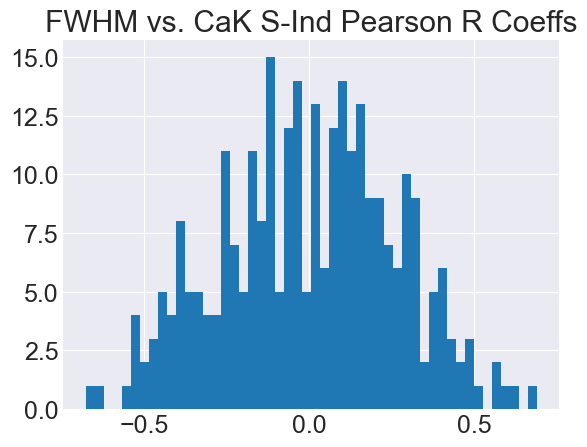

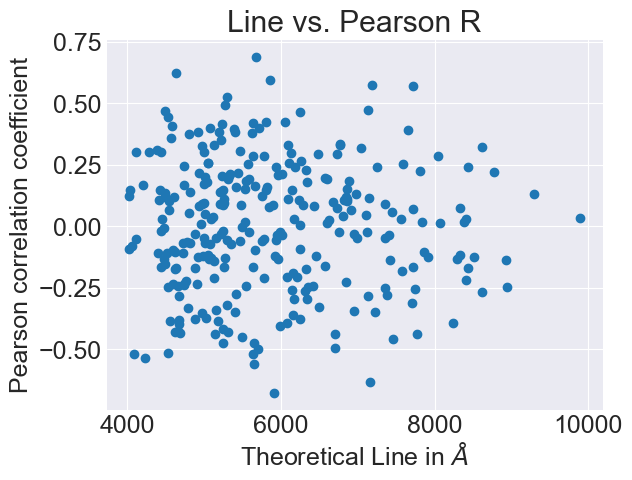

In [27]:
#create first array of pearson coeffs
p_coeffs = []
for fwhm in fwhm_s:
    p_coeff = pearsonr(np.asarray(fwhm), np.asarray(cak_sinds))
    p_coeffs.append(p_coeff[0])

n,foo,patches = plt.hist(x=p_coeffs, bins=50)
plt.title('FWHM vs. CaK S-Ind Pearson R Coeffs')
plt.show()

#plot showing scatter of coeffs across wavelengths
plt.scatter(theor_lines, p_coeffs)
plt.title('Line vs. Pearson R')
plt.xlabel(r'Theoretical Line in $\AA$')
plt.ylabel('Pearson correlation coefficient')
plt.show()

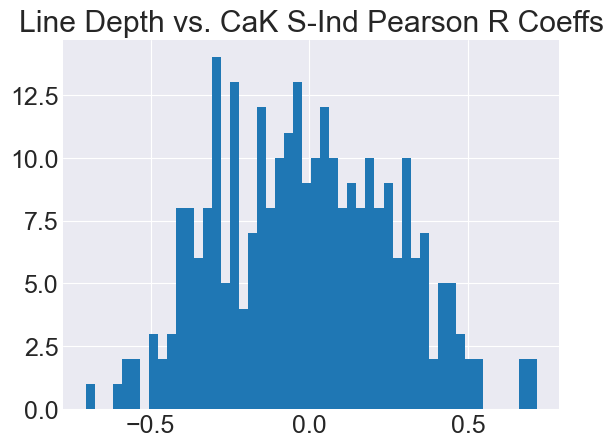

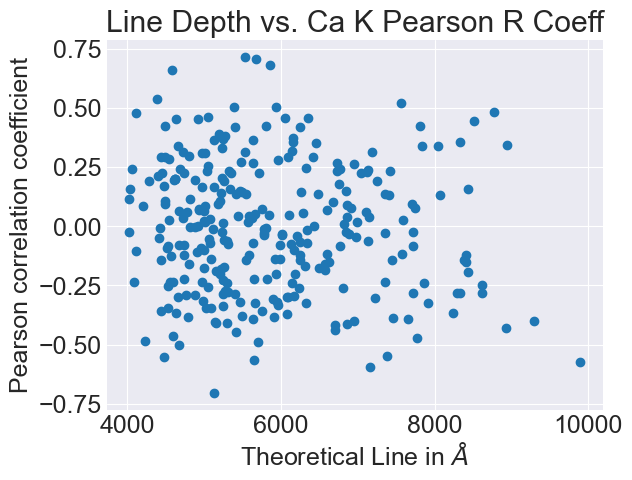

In [92]:
#create coefficients for depth
p_coeffs_d = []
for depthobs in obs_line_depths:
    p_coeff_d = pearsonr(np.asarray(depthobs), np.asarray(cak_sinds))
    p_coeffs_d.append(p_coeff_d[0])
    
n,foo,patches = plt.hist(x=p_coeffs_d, bins=50)
plt.title('Line Depth vs. CaK S-Ind Pearson R Coeffs')
# plt.savefig(f'{spec_path}/presentation_fullplots/CaK_depth_coeffhist.png')
plt.show()

plt.scatter(theor_lines, p_coeffs_d)
plt.title('Line Depth vs. Ca K Pearson R Coeff')
plt.xlabel('Theoretical Line in $\AA$')
plt.ylabel('Pearson correlation coefficient')
# plt.savefig(f'{spec_path}/presentation_fullplots/CaKcoefff_scatter.png')
plt.show()

In [31]:
#read in solar magnetic field info
final_calcs = '/Users/kehrich/Downloads/products/csv_files/calcs/final_calcsold.csv'
calcs_csv = pandas.read_csv(final_calcs,delimiter=',')
calcs_csv.keys()
calcs_jds = calcs_csv['date_jd']
calcs_Bobs = calcs_csv['Bobs']
calcs_fbright = calcs_csv['f_bright']
calcs_fspot = calcs_csv['f_spot']
calcs_fplage = calcs_csv['f_plage']



# We have to interpolate the solar activity measurements because not all of our dates had data available.

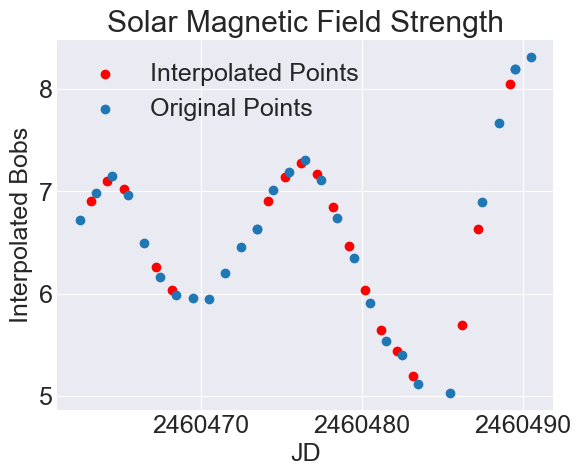

In [33]:
#interpolate and plot solar unsigned mag flux time series
f = interp1d(calcs_jds, calcs_Bobs)
obs_Bobs = f(obs_jds)
plt.scatter(obs_jds, f(obs_jds),c='r',label='Interpolated Points')
plt.scatter(calcs_jds, calcs_Bobs,label='Original Points')

plt.xlabel('JD')
plt.ylabel('Interpolated Bobs')
plt.title('Solar Magnetic Field Strength')
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()


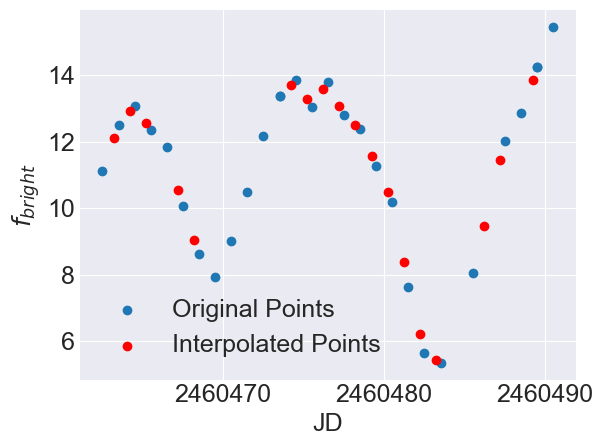

In [34]:
plt.scatter(calcs_jds,calcs_fbright,label='Original Points')
plt.xlabel('JD')
plt.ylabel(r'$f_{bright}$')
plt.ticklabel_format(useOffset=False, style='plain')

f2 = interp1d(calcs_jds, calcs_fbright)
obs_fbrights = f2(obs_jds)
plt.scatter(obs_jds,obs_fbrights,c='r',label='Interpolated Points')
plt.legend()

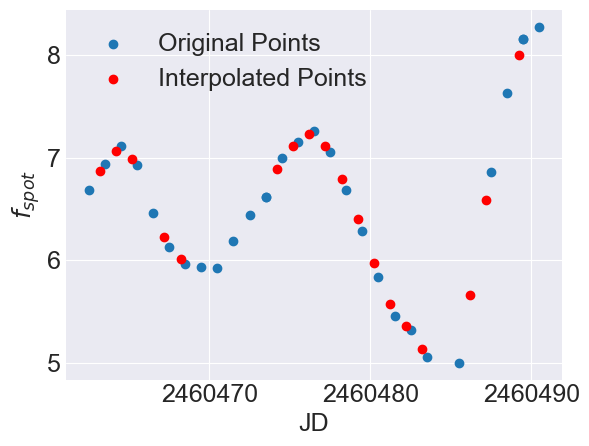

In [35]:
plt.scatter(calcs_jds,calcs_fspot,label='Original Points')
plt.xlabel('JD')
plt.ylabel(r'$f_{spot}$')
plt.ticklabel_format(useOffset=False, style='plain')

f3 = interp1d(calcs_jds, calcs_fspot)
obs_fspots = f3(obs_jds)
plt.scatter(obs_jds,obs_fspots,c='r',label='Interpolated Points')
plt.legend()

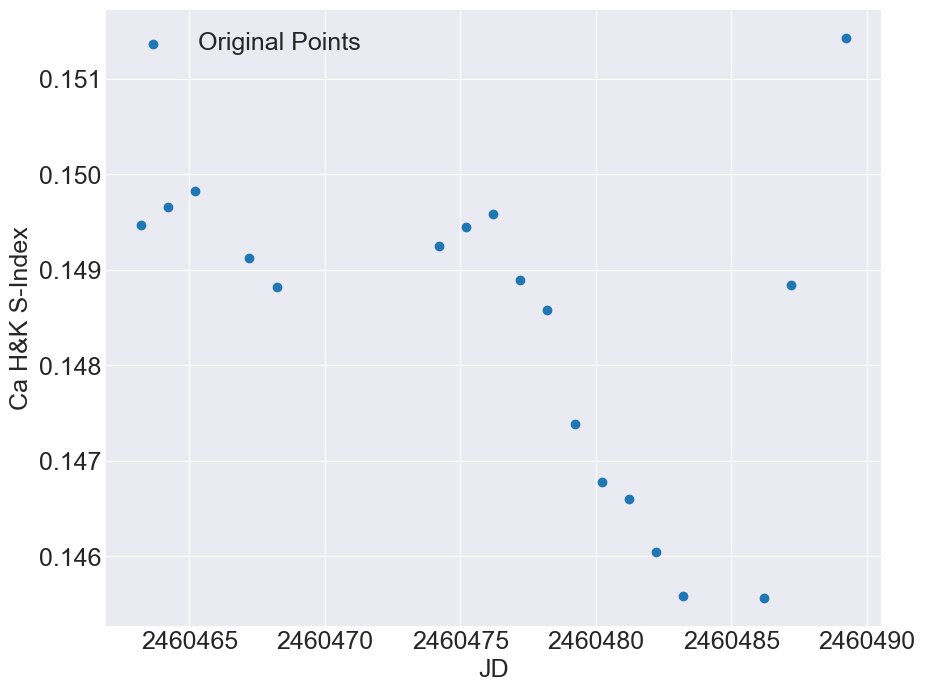

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(obs_jds, cak_sinds,label='Original Points')
plt.xlabel('JD')
plt.ylabel('Ca H&K S-Index')
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()

# plt.title('Solar Magnetic Field Strength')

# Since f_spot and f_bright seem very similar to B_obs, we will exclude them from our analysis to avoid adding unnecessary extra dimensions. Thus, we will only use B_obs, which is calculated from the Solaster pipeline using SDO data, and Ca II H & K S-Index, which is calculated in the NEID pipeline and is a dataproduct included in each spectra .fits file.

7777.419752830404 -0.5986923770187076
Corr Coeff for Bobs vs Dep is -0.5986923770187076 p-val =  0.008661757723056936
Corr Coeff for Bobs vs FWHM is -0.5357022318607867 p-val =  0.02194410288946709
Corr Coeff for S-Ind vs Dep is -0.47156618145780044 p-val =  0.048198169334805585
Corr Coeff for S-Ind vs Dep is -0.43567482507752586 p-val =  0.07072455503616645
Goodness of Fits =  [0.0076905592475974, 0.0212170592980496, 0.0380068226599148, 0.0538370117354314, 0.0490182227641879, 0.0492463285640771, 0.0091351184399996, 0.0261931262314522, 0.0383095142966649, 0.0404336877692815, 0.0447681990391184, 0.0452095844360153, 0.0520885472005303, 0.0488878624292198, 0.0535830138904892, 0.0133648749397061, 0.0068793112605585, 0.0084236183494533]
6155.877799013716 0.41757859657553126
Corr Coeff for Bobs vs Dep is 0.41757859657553126 p-val =  0.08466288181688945
Corr Coeff for Bobs vs FWHM is -0.4518802297408472 p-val =  0.05975267529100916
Corr Coeff for S-Ind vs Dep is 0.35552714311429634 p-val =  0

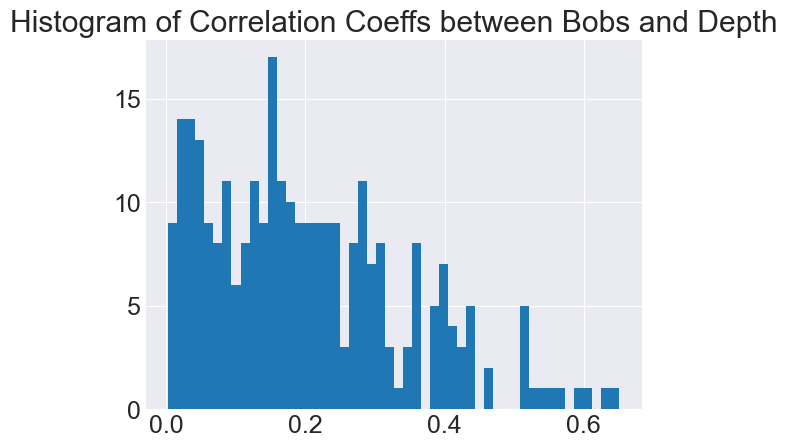

In [100]:
p_coeffs_Bobs_s = []
p_vals_Bobs_s = []
p_coeffs_caks = []
p_vals_caks = []
p_depcoeff_Bobs_s = []
p_valdep_Bobs_s = []
p_depcoeff_caks = []
p_valdep_caks = []
magline_count = 0

magline_bobdep_coeffs = []
magline_bobfwhm_coeffs = []
magline_cakdep_coeffs = []
magline_cakfwhm_coeffs = []

magline_dict = {}
magline_coeffs = {}
allline_coeffs = {}
for ind, fwhm in enumerate(fwhm_s):
    p_coeff_Bobs = pearsonr(np.asarray(fwhm), np.asarray(f(obs_jds)))
    p_coeffs_Bobs_s.append(abs(p_coeff_Bobs[0]))
    p_vals_Bobs_s.append(abs(p_coeff_Bobs[1]))
    p_coeff_cak = pearsonr(np.asarray(fwhm), np.asarray(cak_sinds))
    p_coeffs_caks.append(abs(p_coeff_cak[0]))
    p_vals_caks.append(p_coeff_cak[1])
    p_depcoeff_Bobs = pearsonr(np.asarray(obs_line_depths[ind]), np.asarray(f(obs_jds)))
    p_depcoeff_Bobs_s.append(abs(p_depcoeff_Bobs[0]))
    p_valdep_Bobs_s.append(p_depcoeff_Bobs[1])
    p_depcoeff_cak = pearsonr(np.asarray(obs_line_depths[ind]), np.asarray(cak_sinds))
    p_valdep_caks.append(p_depcoeff_cak[1])
    p_depcoeff_caks.append(abs(p_depcoeff_cak[0]))
    if abs(p_depcoeff_Bobs[0]) > 0.3:
        magline_count+=1
        magline_dict[theor_lines[ind]] = [fwhm_s[ind],obs_line_depths[ind],((theor_lines[ind]-obs_lines[ind])/theor_lines[ind])*3e5,1]
        magline_coeffs[theor_lines[ind]] = [p_depcoeff_Bobs[0],p_coeff_Bobs[0],p_depcoeff_cak[0],p_coeff_cak[0]]
        
        print(theor_lines[ind], p_depcoeff_Bobs[0])
        print('Corr Coeff for Bobs vs Dep is',p_depcoeff_Bobs[0],'p-val = ',p_depcoeff_Bobs[1])
        print('Corr Coeff for Bobs vs FWHM is',p_coeff_Bobs[0],'p-val = ',p_coeff_Bobs[1])
        print('Corr Coeff for S-Ind vs Dep is',p_depcoeff_cak[0],'p-val = ',p_depcoeff_cak[1])
        print('Corr Coeff for S-Ind vs Dep is',p_coeff_cak[0],'p-val = ',p_coeff_cak[1])
        print('Goodness of Fits = ', gofs[ind])

        magline_bobdep_coeffs.append(abs(p_depcoeff_Bobs[0]))
        magline_bobfwhm_coeffs.append(abs(p_coeff_Bobs[0]))
        magline_cakdep_coeffs.append(abs(p_depcoeff_cak[0]))
        magline_cakfwhm_coeffs.append(abs(p_coeff_cak[0]))

        ### plots below, excluding for Github to save memory. Can be uncommented to check individual correlations

        # plt.scatter(obs_jds, fwhm)
        # plt.title('FWHM Time Series')
        # plt.show()
        
        # plt.scatter(fwhm, f(obs_jds))
        # plt.title('FWHM vs. Bobs')
        # # plt.savefig(f'{spec_path}/presentation_fullplots/{theor_lines[ind]}_fwhm_Bobscoeff.png')
        # plt.show()
        
        # plt.scatter(obs_jds, obs_line_depths[ind])
        # plt.title('Depth Time Series')
        # plt.show()
        
        # plt.scatter(obs_line_depths[ind], f(obs_jds))
        # plt.title('Depth vs. Bobs')
        # # plt.savefig(f'{spec_path}/presentation_fullplots/{theor_lines[ind]}_Depth_Bobscoeff.png')
        # plt.show()
        
        # plt.scatter(fwhm, cak_sinds)
        # plt.title('FWHM vs. Ca K')
        # # plt.savefig(f'{spec_path}/presentation_fullplots/{theor_lines[ind]}_fwhm_CaKcoeff.png')
        # plt.show()
        
        # plt.scatter(obs_line_depths[ind], cak_sinds)
        # plt.title('Depth vs. Ca K')
        # # plt.savefig(f'{spec_path}/presentation_fullplots/{theor_lines[ind]}_Depth_CaKcoeff.png')
        # plt.show()
    else:
        magline_dict[theor_lines[ind]] = [fwhm_s[ind],obs_line_depths[ind],((theor_lines[ind]-obs_lines[ind])/theor_lines[ind])*3e5,0]
        allline_coeffs[theor_lines[ind]] = [p_depcoeff_Bobs[0],p_coeff_Bobs[0],p_depcoeff_cak[0],p_coeff_cak[0]]

        
n,foo,patches = plt.hist(x=p_depcoeff_Bobs_s, bins=50)
plt.title('Histogram of Correlation Coeffs between Bobs and Depth')
print('Number of Magnetically Sensitive Lines is', magline_count)

# We now create a df that has the correlation coefficients for each line between Depth and B_obs, FWHM and B_obs, depth and S-Index, and FWHM and S-index. We only include lines that have a correlation coefficient greater than 0.3, since that is the field standard for when a line is considered to be activity-sensitive. 

# We also use the absolute value of each correlation coefficient, since the magnitude of the coefficient is more telling than whether is it positively or negatively correlated--we want to remove activity-sensitive lines, regardless of how they are sensitive.

In [48]:
from sklearn.decomposition import PCA

In [52]:
len(p_coeffs_caks)

286

In [53]:
coeffs = {'Dep v. Bobs' : magline_bobdep_coeffs, 'FWHM v. Bobs':magline_bobfwhm_coeffs, 'Dep v. S-Ind':magline_cakdep_coeffs, 'FWHM v. S-Ind':magline_cakfwhm_coeffs}
df = pd.DataFrame(coeffs)
df

,Dep v. Bobs,FWHM v. Bobs,Dep v. S-Ind,FWHM v. S-Ind
0,0.598692,0.535702,0.471566,0.435675
1,0.417579,0.451880,0.355527,0.361960
2,0.458975,0.203983,0.371594,0.190813
3,0.361778,0.153747,0.312050,0.110033
4,0.469612,0.483022,0.391158,0.390048
...,...,...,...,...
58,0.324802,0.019536,0.353029,0.119563
59,0.397641,0.151998,0.344028,0.128045
60,0.437862,0.385606,0.421426,0.423355
61,0.434770,0.356576,0.546315,0.280336


# Perform a PCA and create a biplot 

In [55]:
pca = PCA()
transform = pca.fit_transform(df)

In [56]:
evr = pca.explained_variance_ratio_
print(evr[0], evr[1], evr[2], evr[3])

0.6999523080789685 0.21869997600991356 0.05800422694232689 0.023343488968791206


In [57]:
# this function will plot a biplot given principal components, loadings, and variable labels

def biplot(PCs,coef,labels=None):
    plt.figure(figsize=(10,10))
    xs = PCs[:,0] # PC1 (change indices for different PCs)
    ys = PCs[:,1] # PC2
    coef = np.transpose(coef)
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=15,
                color='red')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15,
                 coef[i,1] * 1.15,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('Biplot')


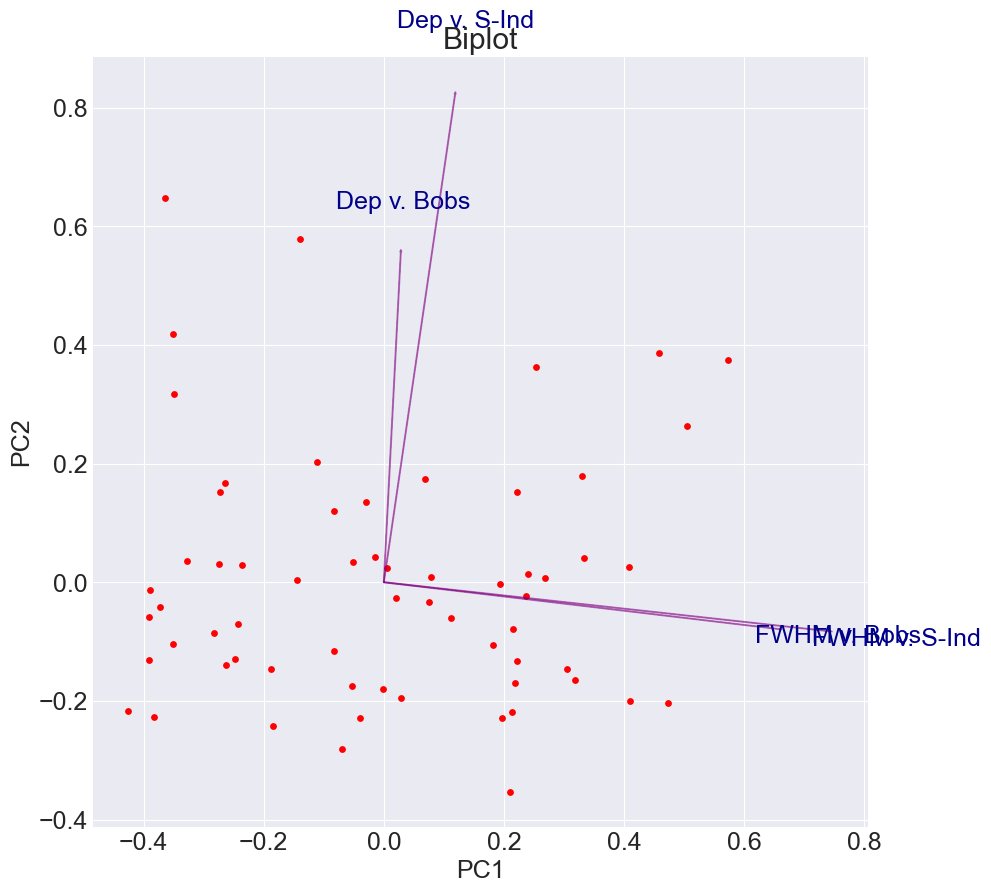

In [58]:
# plot biplot 
biplot(transform, pca.components_,list(df.columns))


# Use K-means clustering to identify 4 clusters based on correlation coefficients

In [61]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
print(kmeans.cluster_centers_)

[[0.55060492 0.09371932 0.56834594 0.11204535]
 [0.42243157 0.45069091 0.44035457 0.49260359]
 [0.3793331  0.25868823 0.40420809 0.29865065]
 [0.37123746 0.09658585 0.33483358 0.10102145]]


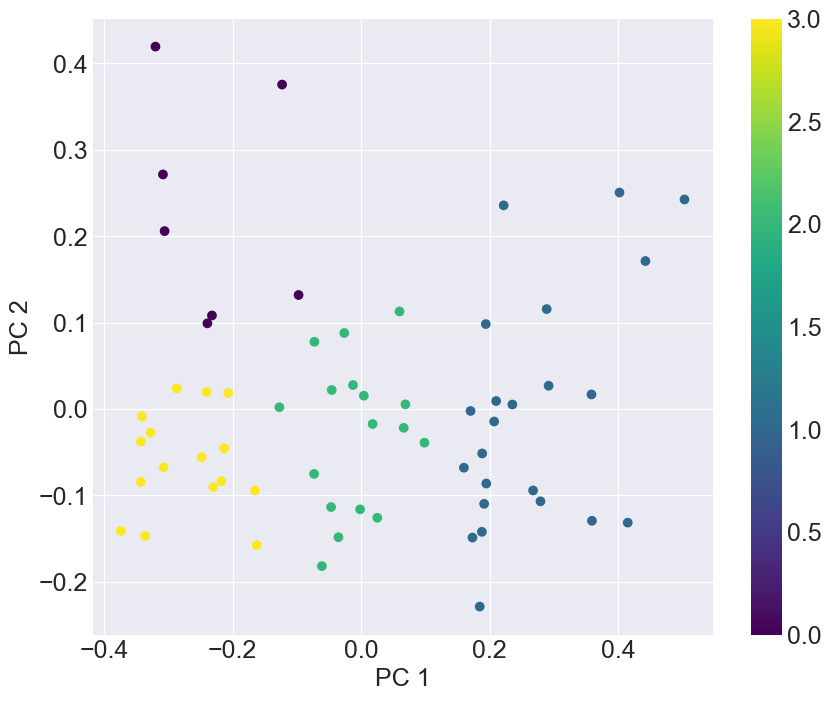

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(transform[:,0],transform[:,1],c=clusters,cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

# Create new biplot color-coded by clusters

In [64]:
# modified biplot function

# klabels is the labels generated by k-means clustering

def biplot_clusters(PCs,coef, klabels, labels=None):
    plt.figure(figsize=(10,10))
    xs = PCs[:,0] # PC1 (change indices for different PCs)
    ys = PCs[:,1] # PC2
    coef = np.transpose(coef)
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.scatter(xs * scalex,ys * scaley, c = klabels,cmap='viridis')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.1,
                 coef[i,1] * 1.1,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('Biplot')

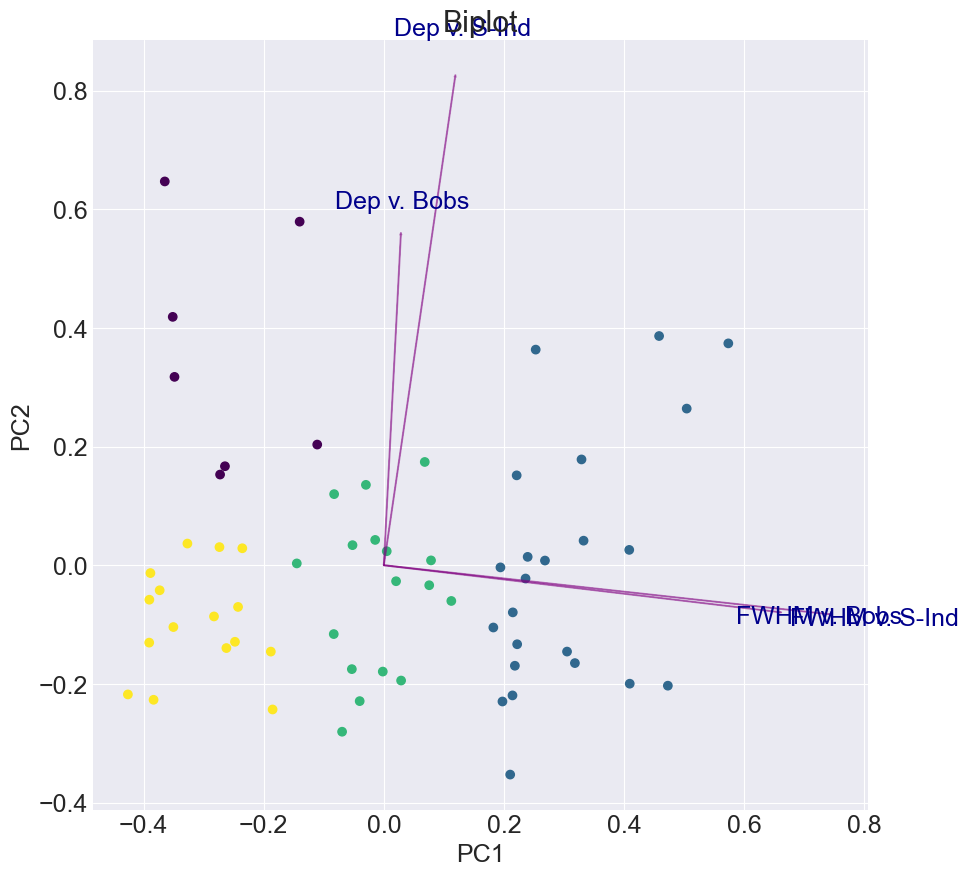

In [65]:
klabels = clusters
biplot_clusters(transform, pca.components_,klabels,list(df.columns))

# We see that the FWHM correlation coefficients are nearly orthogonal to the depth coefficients, but each respective parameter has similar loadings. It's interesting that this is the dominant effect, and that the vectors with the same activity indicators (B_obs and S-Ind) aren't aligning more.

# Now, we will try this with only two groups, and we will include all lines, not just activity-sensitive ones to identify two groups from our sample: Activity-Sensitive, and Not Activity-Sensitive.

In [67]:
coeffsall = {'Dep v. Bobs' : p_depcoeff_Bobs_s, 'FWHM v. Bobs':p_coeffs_Bobs_s, 'Dep v. S-Ind':p_depcoeff_caks, 'FWHM v. S-Ind':p_coeffs_caks}
dfall = pd.DataFrame(coeffsall)
dfall


,Dep v. Bobs,FWHM v. Bobs,Dep v. S-Ind,FWHM v. S-Ind
0,0.220105,0.228551,0.254376,0.256017
1,0.283155,0.111926,0.283750,0.118521
2,0.598692,0.535702,0.471566,0.435675
3,0.417579,0.451880,0.355527,0.361960
4,0.458975,0.203983,0.371594,0.190813
...,...,...,...,...
281,0.109536,0.119539,0.233053,0.138712
282,0.561378,0.081520,0.522139,0.030759
283,0.022530,0.036967,0.116818,0.182330
284,0.230587,0.007152,0.081799,0.069649


In [68]:
pca2 = PCA()
transform2 = pca2.fit_transform(dfall)

In [70]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
clusters2 = kmeans2.fit_predict(dfall)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


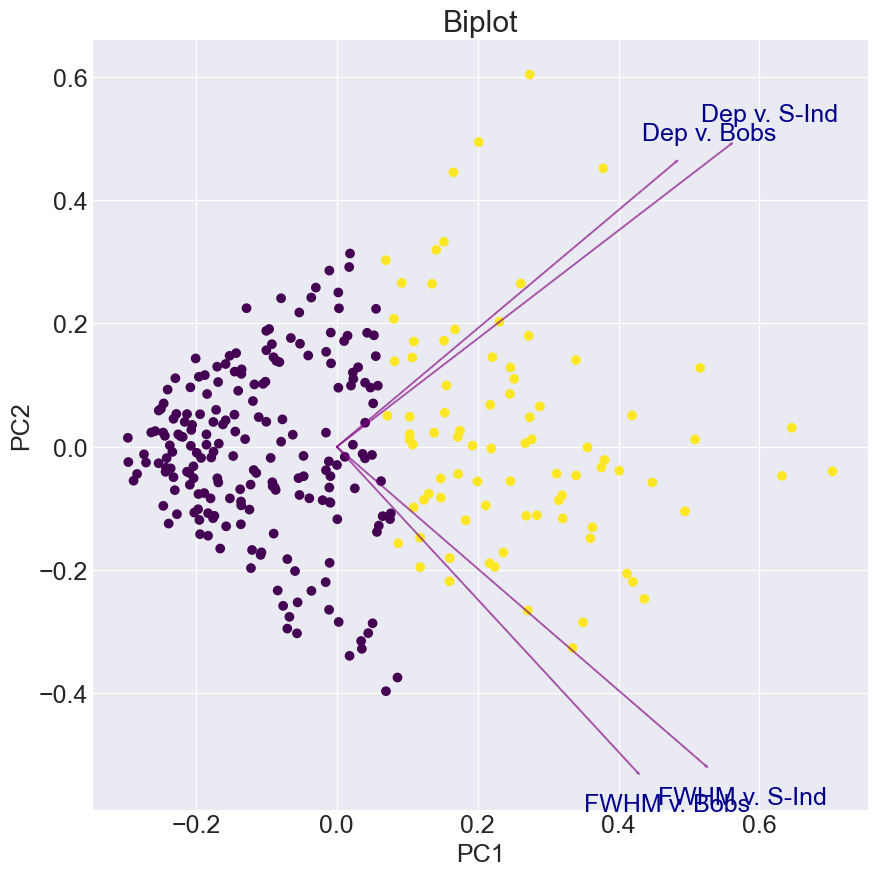

In [71]:
klabels2 = clusters2
biplot_clusters(transform2, pca2.components_,klabels2,list(dfall.columns))